<a href="https://colab.research.google.com/github/gregoryerices/gregoryerices.github.com/blob/master/modelo_mejorado_prediccion_consumo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

# Ajustar las rutas a los archivos CSV de train y test
df_train = pd.read_csv('C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Proyecto integradior ciencia de datos/proyecto1/dataset/train.csv')
df_test = pd.read_csv('C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Proyecto integradior ciencia de datos/proyecto1/dataset/test.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Rodrigo/OneDrive/Escritorio/UNAB/Clases_apuntes/Proyecto integradior ciencia de datos/proyecto1/dataset/train.csv'

In [ ]:
# Verificar la estructura inicial de train
print("Información del df_train:")
df_train.info()
print("\nPrimeras filas de df_train:")
display(df_train.head())

# Verificar la estructura inicial de test
print("Información del df_test:")
df_test.info()
print("\nPrimeras filas de df_test:")
display(df_test.head())


Información del df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244391 entries, 0 to 244390
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   substation   244391 non-null  object 
 1   date         244391 non-null  object 
 2   consumption  244391 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.6+ MB

Primeras filas de df_train:


,substation,date,consumption
0,AJAHUEL,2018-01-01 00:00:00,137.330840
1,AJAHUEL,2018-01-01 01:00:00,124.045549
2,AJAHUEL,2018-01-01 02:00:00,118.137811
3,AJAHUEL,2018-01-01 03:00:00,107.899499
4,AJAHUEL,2018-01-01 04:00:00,100.362069


Información del df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61313 entries, 0 to 61312
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   substation   61313 non-null  object 
 1   date         61313 non-null  object 
 2   consumption  61313 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB

Primeras filas de df_test:


,substation,date,consumption
0,AJAHUEL,2022-01-01 00:00:00,102.093131
1,AJAHUEL,2022-01-01 01:00:00,82.379086
2,AJAHUEL,2022-01-01 02:00:00,75.126780
3,AJAHUEL,2022-01-01 03:00:00,69.140084
4,AJAHUEL,2022-01-01 04:00:00,66.442176


In [ ]:
expected_cols = {'substation', 'date', 'consumption'}

train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

print("Columnas en df_train:", train_cols)
print("Columnas en df_test:", test_cols)

if not expected_cols.issubset(train_cols):
    print("Advertencia: df_train no contiene todas las columnas esperadas.")
if not expected_cols.issubset(test_cols):
    print("Advertencia: df_test no contiene todas las columnas esperadas.")


Columnas en df_train: {'substation', 'date', 'consumption'}
Columnas en df_test: {'substation', 'date', 'consumption'}


In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

print("Fechas nulas en df_train (después de conversión):", df_train['date'].isna().sum())
print("Fechas nulas en df_test (después de conversión):", df_test['date'].isna().sum())


Fechas nulas en df_train (después de conversión): 0
Fechas nulas en df_test (después de conversión): 0


In [ ]:
print("Información final de df_train después de conversión:")
df_train.info()
print("\nInformación final de df_test después de conversión:")
df_test.info()

Información final de df_train después de conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244391 entries, 0 to 244390
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   substation   244391 non-null  object        
 1   date         244391 non-null  datetime64[ns]
 2   consumption  244391 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ MB

Información final de df_test después de conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61313 entries, 0 to 61312
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   substation   61313 non-null  object        
 1   date         61313 non-null  datetime64[ns]
 2   consumption  61313 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
unique_subs_train = df_train['substation'].unique()
unique_subs_test = df_test['substation'].unique()

print("Número de subestaciones en train:", len(unique_subs_train))
print("Número de subestaciones en test:", len(unique_subs_test))

missing_subs_in_train = set(unique_subs_test) - set(unique_subs_train)
if missing_subs_in_train:
    print("Subestaciones en test que no están en train:", missing_subs_in_train)
else:
    print("Todas las subestaciones de test están presentes en train.")


Número de subestaciones en train: 7
Número de subestaciones en test: 7
Todas las subestaciones de test están presentes en train.


In [ ]:
##################### SEGMENTACIÓN DE SUBESTACIONES ##############################

In [ ]:
unique_subs = df_train['substation'].unique()

train_by_substation = {}
for sub in unique_subs:
    train_by_substation[sub] = df_train[df_train['substation'] == sub].copy()

print("Subestaciones en train:", list(train_by_substation.keys()))


Subestaciones en train: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']


In [ ]:
test_by_substation = {}

for sub in unique_subs:
    test_by_substation[sub] = df_test[df_test['substation'] == sub].copy()

print("Subestaciones en test:", list(test_by_substation.keys()))


Subestaciones en test: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']


In [ ]:
# Probar con cada subestación:

print("Información df_train de AJAHUEL:")
train_by_substation['AJAHUEL'].info()

print("\nPrimeras filas df_train de AJAHUEL:")
display(train_by_substation['AJAHUEL'].head())

print("\nInformación df_test de AJAHUEL:")
test_by_substation['AJAHUEL'].info()

print("\nPrimeras filas df_test de AJAHUEL:")
display(test_by_substation['AJAHUEL'].head())

Información df_train de AJAHUEL:
<class 'pandas.core.frame.DataFrame'>
Index: 34913 entries, 0 to 34912
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   substation   34913 non-null  object        
 1   date         34913 non-null  datetime64[ns]
 2   consumption  34913 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB

Primeras filas df_train de AJAHUEL:


,substation,date,consumption
0,AJAHUEL,2018-01-01 00:00:00,137.330840
1,AJAHUEL,2018-01-01 01:00:00,124.045549
2,AJAHUEL,2018-01-01 02:00:00,118.137811
3,AJAHUEL,2018-01-01 03:00:00,107.899499
4,AJAHUEL,2018-01-01 04:00:00,100.362069



Información df_test de AJAHUEL:
<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 0 to 8758
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   substation   8759 non-null   object        
 1   date         8759 non-null   datetime64[ns]
 2   consumption  8759 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 273.7+ KB

Primeras filas df_test de AJAHUEL:


,substation,date,consumption
0,AJAHUEL,2022-01-01 00:00:00,102.093131
1,AJAHUEL,2022-01-01 01:00:00,82.379086
2,AJAHUEL,2022-01-01 02:00:00,75.126780
3,AJAHUEL,2022-01-01 03:00:00,69.140084
4,AJAHUEL,2022-01-01 04:00:00,66.442176


In [ ]:
################################### Completar fechas faltantes ####################################

In [ ]:
from pandas import date_range

train_filled_by_substation = {}
test_filled_by_substation = {}

In [ ]:
global_min_date = df_train['date'].min()
global_max_date = df_test['date'].max()

print("Fecha mínima global (train):", global_min_date)
print("Fecha máxima global (test):", global_max_date)

Fecha mínima global (train): 2018-01-01 00:00:00
Fecha máxima global (test): 2022-12-31 23:00:00


In [ ]:
for sub in unique_subs:

    train_sub = train_by_substation[sub]
    test_sub = test_by_substation[sub]

    combined = pd.concat([train_sub, test_sub], ignore_index=True)
    combined = combined.sort_values('date')

    full_date_range = date_range(start=global_min_date, end=global_max_date, freq='H')

    full_df = pd.DataFrame({'date': full_date_range})

    full_df = full_df.merge(combined[['date','substation','consumption']], on='date', how='left')

    full_df['substation'] = sub

    full_df = full_df.sort_values('date').reset_index(drop=True)
    full_df['consumption'] = full_df['consumption'].interpolate(method='linear', limit_direction='both')

    train_mask = (full_df['date'] >= train_sub['date'].min()) & (full_df['date'] <= train_sub['date'].max())
    test_mask = (full_df['date'] >= test_sub['date'].min()) & (full_df['date'] <= test_sub['date'].max())

    train_filled_by_substation[sub] = full_df[train_mask].copy()
    test_filled_by_substation[sub] = full_df[test_mask].copy()

In [ ]:
example_sub = 'AJAHUEL'
print("Train AJAHUEL después de interpolar:")
display(train_filled_by_substation[example_sub].head(10))
display(train_filled_by_substation[example_sub].tail(10))

print("Test AJAHUEL después de interpolar:")
display(test_filled_by_substation[example_sub].head(10))
display(test_filled_by_substation[example_sub].tail(10))

print("Nulos en train AJAHUEL:", train_filled_by_substation[example_sub]['consumption'].isna().sum())
print("Nulos en test AJAHUEL:", test_filled_by_substation[example_sub]['consumption'].isna().sum())

train_dates = train_filled_by_substation[example_sub]['date']
test_dates = test_filled_by_substation[example_sub]['date']
print("Frecuencia train AJAHUEL:", pd.infer_freq(train_dates))
print("Frecuencia test AJAHUEL:", pd.infer_freq(test_dates))

Train AJAHUEL después de interpolar:


,date,substation,consumption
0,2018-01-01 00:00:00,AJAHUEL,137.330840
1,2018-01-01 01:00:00,AJAHUEL,124.045549
2,2018-01-01 02:00:00,AJAHUEL,118.137811
3,2018-01-01 03:00:00,AJAHUEL,107.899499
4,2018-01-01 04:00:00,AJAHUEL,100.362069
5,2018-01-01 05:00:00,AJAHUEL,93.517135
6,2018-01-01 06:00:00,AJAHUEL,86.521943
7,2018-01-01 07:00:00,AJAHUEL,78.217783
8,2018-01-01 08:00:00,AJAHUEL,71.897005
9,2018-01-01 09:00:00,AJAHUEL,75.800149


,date,substation,consumption
35054,2021-12-31 14:00:00,AJAHUEL,158.216437
35055,2021-12-31 15:00:00,AJAHUEL,160.602296
35056,2021-12-31 16:00:00,AJAHUEL,159.844405
35057,2021-12-31 17:00:00,AJAHUEL,161.966010
35058,2021-12-31 18:00:00,AJAHUEL,164.340379
35059,2021-12-31 19:00:00,AJAHUEL,157.753424
35060,2021-12-31 20:00:00,AJAHUEL,132.997811
35061,2021-12-31 21:00:00,AJAHUEL,132.565346
35062,2021-12-31 22:00:00,AJAHUEL,140.933730
35063,2021-12-31 23:00:00,AJAHUEL,120.671770


Test AJAHUEL después de interpolar:


,date,substation,consumption
35064,2022-01-01 00:00:00,AJAHUEL,102.093131
35065,2022-01-01 01:00:00,AJAHUEL,82.379086
35066,2022-01-01 02:00:00,AJAHUEL,75.126780
35067,2022-01-01 03:00:00,AJAHUEL,69.140084
35068,2022-01-01 04:00:00,AJAHUEL,66.442176
35069,2022-01-01 05:00:00,AJAHUEL,58.462154
35070,2022-01-01 06:00:00,AJAHUEL,56.457147
35071,2022-01-01 07:00:00,AJAHUEL,48.162715
35072,2022-01-01 08:00:00,AJAHUEL,43.210797
35073,2022-01-01 09:00:00,AJAHUEL,56.440157


,date,substation,consumption
43814,2022-12-31 14:00:00,AJAHUEL,133.330473
43815,2022-12-31 15:00:00,AJAHUEL,131.399527
43816,2022-12-31 16:00:00,AJAHUEL,121.298380
43817,2022-12-31 17:00:00,AJAHUEL,123.176585
43818,2022-12-31 18:00:00,AJAHUEL,121.097971
43819,2022-12-31 19:00:00,AJAHUEL,120.624969
43820,2022-12-31 20:00:00,AJAHUEL,113.313037
43821,2022-12-31 21:00:00,AJAHUEL,102.675218
43822,2022-12-31 22:00:00,AJAHUEL,121.108517
43823,2022-12-31 23:00:00,AJAHUEL,105.606013


Nulos en train AJAHUEL: 0
Nulos en test AJAHUEL: 0
Frecuencia train AJAHUEL: H
Frecuencia test AJAHUEL: H


In [ ]:
diff = train_filled_by_substation[sub]['date'].diff().dropna()
print(diff.value_counts())
diff = test_filled_by_substation[sub]['date'].diff().dropna()
print(diff.value_counts())

date
0 days 01:00:00    35063
Name: count, dtype: int64
date
0 days 01:00:00    8759
Name: count, dtype: int64


In [ ]:
################################ ourliers y su análisis ############################

In [ ]:
!pip install matplotlib


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


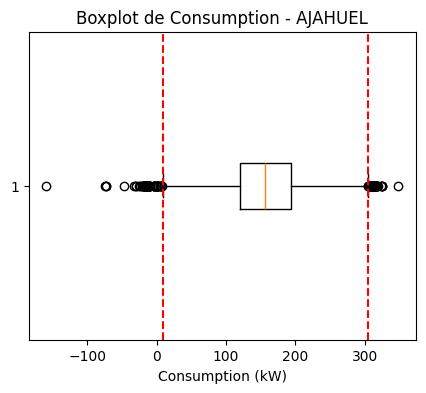

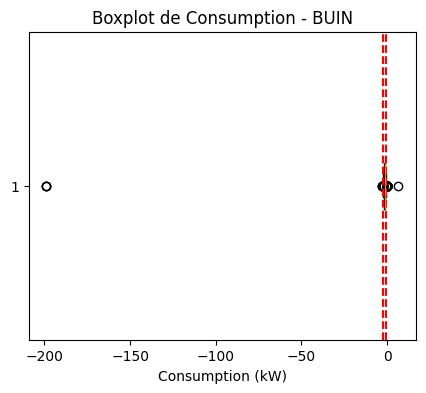

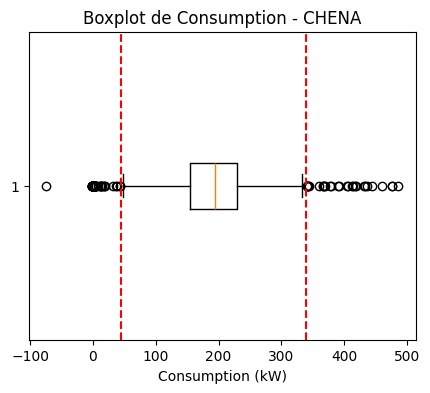

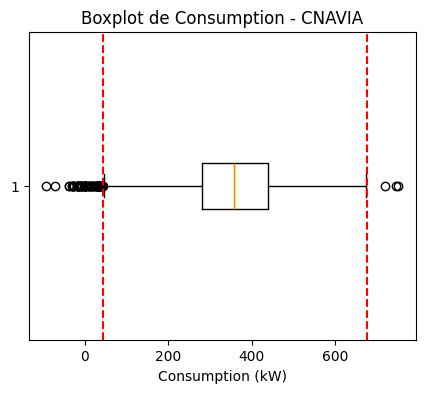

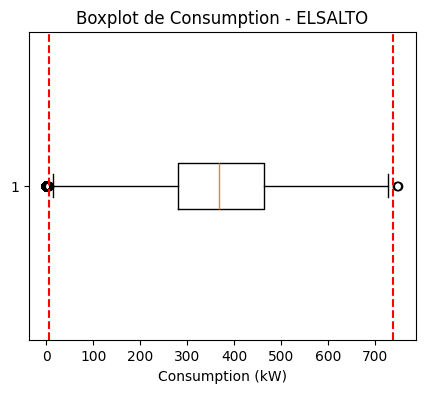

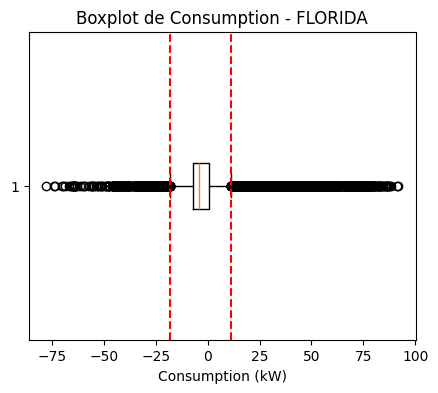

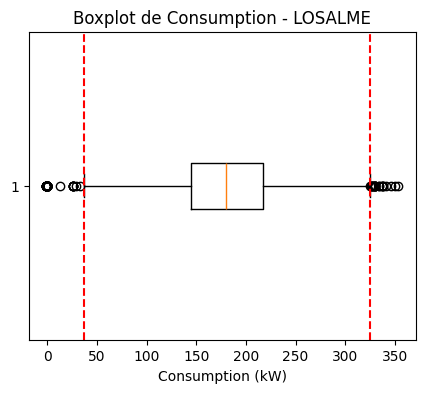

In [ ]:
import matplotlib.pyplot as plt

outliers_info = {}

for sub in unique_subs:

    df = train_filled_by_substation[sub]

    Q1 = df['consumption'].quantile(0.25)
    Q3 = df['consumption'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df['consumption'] < lower_bound) | (df['consumption'] > upper_bound)]

    outliers_info[sub] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
        'outliers_sample': outliers.head(5)
    }

    plt.figure(figsize=(5, 4))
    plt.boxplot(df['consumption'], vert=False)
    plt.title(f"Boxplot de Consumption - {sub}")
    plt.axvline(x=lower_bound, color='r', linestyle='--')
    plt.axvline(x=upper_bound, color='r', linestyle='--')
    plt.xlabel('Consumption (kW)')
    plt.show()

In [ ]:
outlier_summary = pd.DataFrame([
    {
        'substation': sub,
        'Q1': info['Q1'],
        'Q3': info['Q3'],
        'IQR': info['IQR'],
        'lower_bound': info['lower_bound'],
        'upper_bound': info['upper_bound'],
        'num_outliers': info['num_outliers']
    }
    for sub, info in outliers_info.items()
])

display(outlier_summary)


,substation,Q1,Q3,IQR,lower_bound,upper_bound,num_outliers
0,AJAHUEL,119.854330,193.953513,74.099183,8.705555,305.102289,165
1,BUIN,-1.569828,-1.138468,0.431360,-2.216868,-0.491427,174
2,CHENA,154.904518,228.849061,73.944543,43.987704,339.765875,310
3,CNAVIA,281.036087,439.645029,158.608943,43.122673,677.558443,70
4,ELSALTO,280.948017,464.005314,183.057297,6.362072,738.591259,201
5,FLORIDA,-6.934194,0.415733,7.349927,-17.959084,11.440623,2547
6,LOSALME,144.764545,216.802803,72.038258,36.707159,324.860190,135


In [ ]:
########################## análisis y tratamiento outliers ###########################

In [ ]:
##### Celda para validar 1

In [ ]:
for sub in unique_subs:
    df = train_filled_by_substation[sub]
    negative_outliers = df[df['consumption'] < 0]
    if not negative_outliers.empty:
        print(f"Subestación: {sub}")
        print("Outliers negativos detectados:")
        display(negative_outliers.head(10))  # Ver primeras filas
        print("Cantidad de outliers negativos:", len(negative_outliers))
        print("Rango de valores negativos:", negative_outliers['consumption'].min(), negative_outliers['consumption'].max())
        print("---")

Subestación: AJAHUEL
Outliers negativos detectados:


,date,substation,consumption
70,2018-01-03 22:00:00,AJAHUEL,-46.166978
71,2018-01-03 23:00:00,AJAHUEL,-73.552760
72,2018-01-04 00:00:00,AJAHUEL,-73.489645
73,2018-01-04 01:00:00,AJAHUEL,-72.438750
3168,2018-05-13 00:00:00,AJAHUEL,-3.282549
3169,2018-05-13 01:00:00,AJAHUEL,-3.452455
3170,2018-05-13 02:00:00,AJAHUEL,-3.289080
3171,2018-05-13 03:00:00,AJAHUEL,-3.212068
3172,2018-05-13 04:00:00,AJAHUEL,-3.010799
3173,2018-05-13 05:00:00,AJAHUEL,-3.107184


Cantidad de outliers negativos: 73
Rango de valores negativos: -159.019095 -3.010799
---
Subestación: BUIN
Outliers negativos detectados:


,date,substation,consumption
0,2018-01-01 00:00:00,BUIN,-1.469724
1,2018-01-01 01:00:00,BUIN,-1.485837
2,2018-01-01 02:00:00,BUIN,-1.509146
3,2018-01-01 03:00:00,BUIN,-1.536619
4,2018-01-01 04:00:00,BUIN,-1.564093
5,2018-01-01 05:00:00,BUIN,-1.576319
6,2018-01-01 06:00:00,BUIN,-1.598713
7,2018-01-01 07:00:00,BUIN,-1.608090
8,2018-01-01 08:00:00,BUIN,-1.622559
9,2018-01-01 09:00:00,BUIN,-1.640284


Cantidad de outliers negativos: 34967
Rango de valores negativos: -199.0 -0.5117583333333278
---
Subestación: CHENA
Outliers negativos detectados:


,date,substation,consumption
5693,2018-08-26 05:00:00,CHENA,-1.211135
5694,2018-08-26 06:00:00,CHENA,-1.211134
5695,2018-08-26 07:00:00,CHENA,-0.406106
5697,2018-08-26 09:00:00,CHENA,-0.742523
6026,2018-09-09 02:00:00,CHENA,-1.655967
6027,2018-09-09 03:00:00,CHENA,-0.669827
6029,2018-09-09 05:00:00,CHENA,-0.057607
6030,2018-09-09 06:00:00,CHENA,-1.523439
6031,2018-09-09 07:00:00,CHENA,-2.111467
6032,2018-09-09 08:00:00,CHENA,-1.176772


Cantidad de outliers negativos: 42
Rango de valores negativos: -74.49854500000001 -0.0109379999999981
---
Subestación: CNAVIA
Outliers negativos detectados:


,date,substation,consumption
2091,2018-03-29 03:00:00,CNAVIA,-28.917677
2092,2018-03-29 04:00:00,CNAVIA,-31.439663
8215,2018-12-09 07:00:00,CNAVIA,-5.928047
8216,2018-12-09 08:00:00,CNAVIA,-6.319346
11227,2019-04-13 19:00:00,CNAVIA,-15.570678
11228,2019-04-13 20:00:00,CNAVIA,-29.791264
12258,2019-05-26 18:00:00,CNAVIA,-26.736337
12259,2019-05-26 19:00:00,CNAVIA,-70.971013
12260,2019-05-26 20:00:00,CNAVIA,-92.670096
12423,2019-06-02 15:00:00,CNAVIA,-37.755478


Cantidad de outliers negativos: 25
Rango de valores negativos: -92.670096 -5.8552420000000005
---
Subestación: FLORIDA
Outliers negativos detectados:


,date,substation,consumption
7,2018-01-01 07:00:00,FLORIDA,-0.007068
8,2018-01-01 08:00:00,FLORIDA,-0.020538
9,2018-01-01 09:00:00,FLORIDA,-0.012705
193,2018-01-09 01:00:00,FLORIDA,-0.406255
476,2018-01-20 20:00:00,FLORIDA,-0.046527
545,2018-01-23 17:00:00,FLORIDA,-4.904892
594,2018-01-25 18:00:00,FLORIDA,-4.481615
595,2018-01-25 19:00:00,FLORIDA,-5.594765
596,2018-01-25 20:00:00,FLORIDA,-5.641660
597,2018-01-25 21:00:00,FLORIDA,-5.815124


Cantidad de outliers negativos: 25405
Rango de valores negativos: -77.78276600000001 -0.0038980000000128
---
Subestación: LOSALME
Outliers negativos detectados:


,date,substation,consumption
3347,2018-05-20 11:00:00,LOSALME,-0.420514
3348,2018-05-20 12:00:00,LOSALME,-0.414101
3349,2018-05-20 13:00:00,LOSALME,-0.424551
3350,2018-05-20 14:00:00,LOSALME,-0.442845
3351,2018-05-20 15:00:00,LOSALME,-0.448412
3352,2018-05-20 16:00:00,LOSALME,-0.447827
3353,2018-05-20 17:00:00,LOSALME,-0.435814
8018,2018-12-01 02:00:00,LOSALME,-0.056154
8019,2018-12-01 03:00:00,LOSALME,-0.064975
8020,2018-12-01 04:00:00,LOSALME,-0.060873


Cantidad de outliers negativos: 44
Rango de valores negativos: -1.026872000000001 -0.0139000000000031
---


In [ ]:
df_elsalto = train_filled_by_substation['ELSALTO']
negative_outliers_elsalto = df_elsalto[df_elsalto['consumption'] < 0]
print("Nulos en ELSALTO:", negative_outliers_elsalto.empty)
print("Cantidad de outliers negativos ELSALTO:", len(negative_outliers_elsalto))


Nulos en ELSALTO: True
Cantidad de outliers negativos ELSALTO: 0


In [ ]:
##### Celda para validar 2

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Subestación ELSALTO - Análisis de outliers altos:
Distribución por mes:


month
5    1
4    1
Name: count, dtype: int64

Distribución por hora del día:


hour
23    2
Name: count, dtype: int64

Distribución por día de la semana:


weekday
5    2
Name: count, dtype: int64

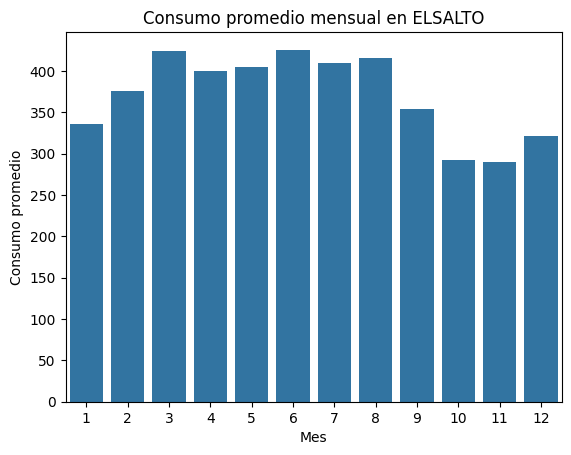

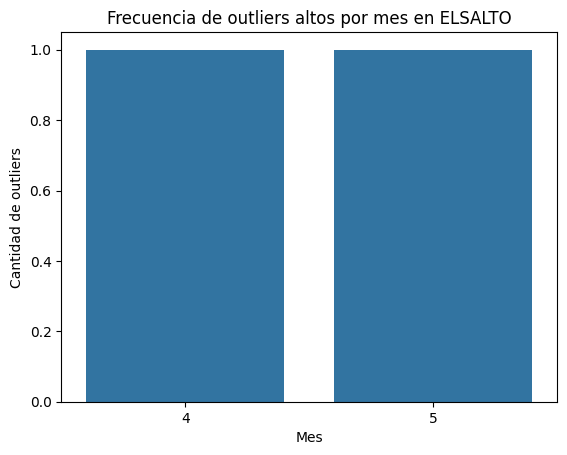

Outlier seleccionado: date           2018-05-12 23:00:00
substation                 ELSALTO
consumption             747.446361
month                            5
hour                            23
weekday                          5
Name: 3167, dtype: object
Consumo un día antes a la misma hora: [472.249642]
Consumo un día después a la misma hora: [412.99689]


In [ ]:
import seaborn as sns

sub = 'ELSALTO'
df = train_filled_by_substation[sub].copy()

Q1 = df['consumption'].quantile(0.25)
Q3 = df['consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_high = df[df['consumption'] > upper_bound].copy()

outliers_high['month'] = outliers_high['date'].dt.month
outliers_high['hour'] = outliers_high['date'].dt.hour
outliers_high['weekday'] = outliers_high['date'].dt.weekday  # Lunes=0, Domingo=6

print(f"Subestación {sub} - Análisis de outliers altos:")
print("Distribución por mes:")
display(outliers_high['month'].value_counts().head(10))

print("Distribución por hora del día:")
display(outliers_high['hour'].value_counts().head(10))

print("Distribución por día de la semana:")
display(outliers_high['weekday'].value_counts().head(10))

monthly_mean = df.groupby(df['date'].dt.month)['consumption'].mean()
monthly_outliers = outliers_high['month'].value_counts().sort_index()

sns.barplot(x=monthly_mean.index, y=monthly_mean.values)
plt.title(f"Consumo promedio mensual en {sub}")
plt.xlabel("Mes")
plt.ylabel("Consumo promedio")
plt.show()

sns.barplot(x=monthly_outliers.index, y=monthly_outliers.values)
plt.title(f"Frecuencia de outliers altos por mes en {sub}")
plt.xlabel("Mes")
plt.ylabel("Cantidad de outliers")
plt.show()
if not outliers_high.empty:
    sample_outlier = outliers_high.iloc[0]
    outlier_date = sample_outlier['date']
    print("Outlier seleccionado:", sample_outlier)

    day_before = outlier_date - pd.Timedelta(days=1)
    day_after = outlier_date + pd.Timedelta(days=1)

    val_day_before = df[df['date'] == day_before]['consumption']
    val_day_after = df[df['date'] == day_after]['consumption']

    print("Consumo un día antes a la misma hora:", val_day_before.values if not val_day_before.empty else "No data")
    print("Consumo un día después a la misma hora:", val_day_after.values if not val_day_after.empty else "No data")

Subestación CNAVIA - Análisis de outliers altos:
Distribución por mes:


month
4    2
5    1
Name: count, dtype: int64

Distribución por hora del día:


hour
23    3
Name: count, dtype: int64

Distribución por día de la semana:


weekday
5    3
Name: count, dtype: int64

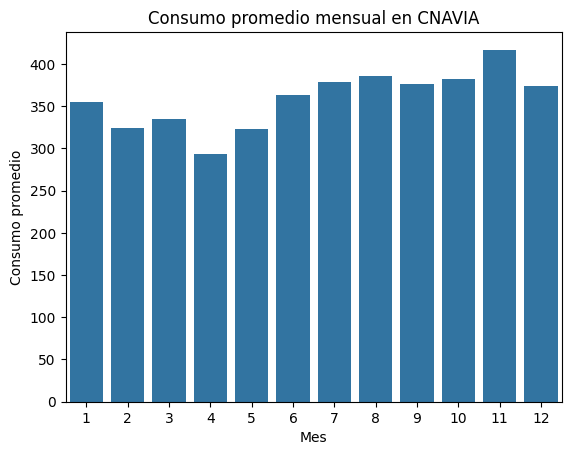

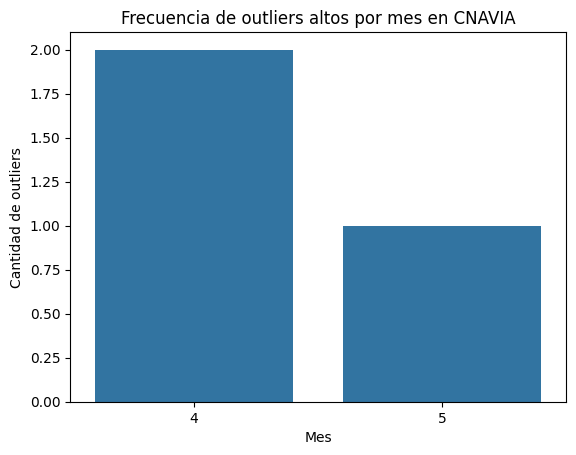

Outlier seleccionado: date           2018-05-12 23:00:00
substation                  CNAVIA
consumption             752.006309
month                            5
hour                            23
weekday                          5
Name: 3167, dtype: object
Consumo un día antes a la misma hora: [403.043175]
Consumo un día después a la misma hora: [344.694896]


In [ ]:
import seaborn as sns

# Elegir una subestación con outliers altos, por ejemplo ELSALTO
sub = 'CNAVIA'
df = train_filled_by_substation[sub].copy()

Q1 = df['consumption'].quantile(0.25)
Q3 = df['consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_high = df[df['consumption'] > upper_bound].copy()

outliers_high['month'] = outliers_high['date'].dt.month
outliers_high['hour'] = outliers_high['date'].dt.hour
outliers_high['weekday'] = outliers_high['date'].dt.weekday  # Lunes=0, Domingo=6

print(f"Subestación {sub} - Análisis de outliers altos:")
print("Distribución por mes:")
display(outliers_high['month'].value_counts().head(10))

print("Distribución por hora del día:")
display(outliers_high['hour'].value_counts().head(10))

print("Distribución por día de la semana:")
display(outliers_high['weekday'].value_counts().head(10))

monthly_mean = df.groupby(df['date'].dt.month)['consumption'].mean()
monthly_outliers = outliers_high['month'].value_counts().sort_index()

sns.barplot(x=monthly_mean.index, y=monthly_mean.values)
plt.title(f"Consumo promedio mensual en {sub}")
plt.xlabel("Mes")
plt.ylabel("Consumo promedio")
plt.show()

sns.barplot(x=monthly_outliers.index, y=monthly_outliers.values)
plt.title(f"Frecuencia de outliers altos por mes en {sub}")
plt.xlabel("Mes")
plt.ylabel("Cantidad de outliers")
plt.show()

if not outliers_high.empty:
    sample_outlier = outliers_high.iloc[0]
    outlier_date = sample_outlier['date']
    print("Outlier seleccionado:", sample_outlier)

    day_before = outlier_date - pd.Timedelta(days=1)
    day_after = outlier_date + pd.Timedelta(days=1)

    val_day_before = df[df['date'] == day_before]['consumption']
    val_day_after = df[df['date'] == day_after]['consumption']

    print("Consumo un día antes a la misma hora:", val_day_before.values if not val_day_before.empty else "No data")
    print("Consumo un día después a la misma hora:", val_day_after.values if not val_day_after.empty else "No data")

In [ ]:
########################## Análisis de outliers negativos ##############################

In [ ]:
negatives_all = []

for sub in unique_subs:
    df = train_filled_by_substation[sub]
    neg_df = df[df['consumption'] < 0].copy()
    if not neg_df.empty:
        neg_df['substation'] = sub
        neg_df['hour'] = neg_df['date'].dt.hour
        neg_df['weekday'] = neg_df['date'].dt.weekday  # Lunes=0, Domingo=6
        neg_df['month'] = neg_df['date'].dt.month
        negatives_all.append(neg_df)

if negatives_all:
    negatives_all_df = pd.concat(negatives_all, ignore_index=True)
    print("Total de registros con valores negativos:", len(negatives_all_df))
else:
    negatives_all_df = pd.DataFrame()
    print("No se encontraron valores negativos en ninguna subestación.")

Total de registros con valores negativos: 60556


Distribución de negativos por hora del día:


hour
0     2668
1     2582
2     2451
3     2321
4     2249
5     2209
6     2206
7     2275
8     2285
9     2315
10    2376
11    2474
12    2556
13    2620
14    2638
15    2667
16    2681
17    2683
18    2681
19    2692
20    2708
21    2738
22    2761
23    2720
Name: consumption, dtype: int64

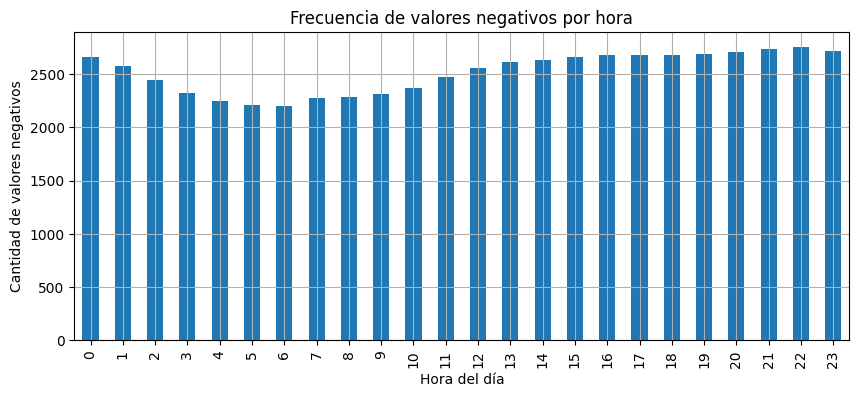

In [ ]:
if not negatives_all_df.empty:
    hour_counts = negatives_all_df.groupby('hour')['consumption'].count()
    print("Distribución de negativos por hora del día:")
    display(hour_counts)

    hour_counts.plot(kind='bar', figsize=(10,4), title='Frecuencia de valores negativos por hora')
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de valores negativos')
    plt.grid(True)
    plt.show()

Distribución de negativos por día de la semana:


weekday
0    8634
1    8677
2    8684
3    8654
4    8682
5    8519
6    8706
Name: consumption, dtype: int64

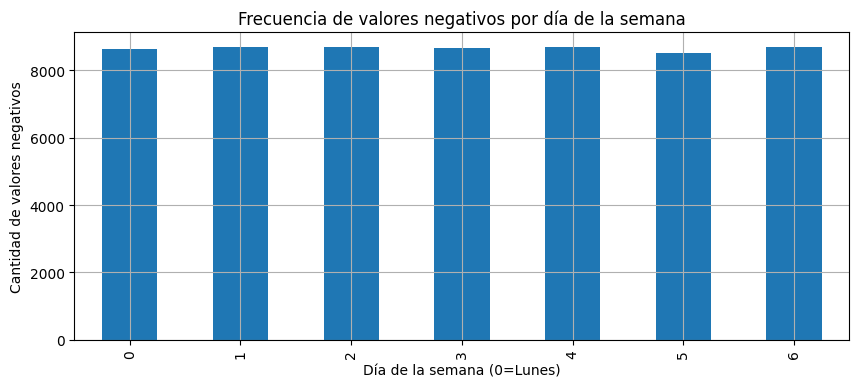

In [ ]:
if not negatives_all_df.empty:
    weekday_counts = negatives_all_df.groupby('weekday')['consumption'].count()
    print("Distribución de negativos por día de la semana:")
    display(weekday_counts)

    weekday_counts.plot(kind='bar', figsize=(10,4), title='Frecuencia de valores negativos por día de la semana')
    plt.xlabel('Día de la semana (0=Lunes)')
    plt.ylabel('Cantidad de valores negativos')
    plt.grid(True)
    plt.show()

Distribución de negativos por mes:


month
1     4017
2     4365
3     5456
4     5467
5     5816
6     5665
7     5875
8     5729
9     5161
10    4878
11    3993
12    4134
Name: consumption, dtype: int64

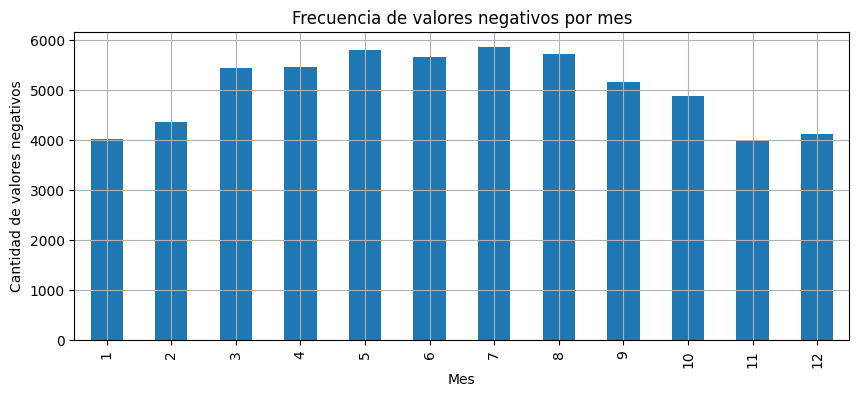

In [ ]:
if not negatives_all_df.empty:
    month_counts = negatives_all_df.groupby('month')['consumption'].count()
    print("Distribución de negativos por mes:")
    display(month_counts)

    month_counts.plot(kind='bar', figsize=(10,4), title='Frecuencia de valores negativos por mes')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de valores negativos')
    plt.grid(True)
    plt.show()

Frecuencia de negativos por mes y hora:


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,178,163,147,140,137,138,136,137,135,142,...,176,186,190,195,194,193,197,198,210,196
2,196,183,162,154,151,152,153,155,152,156,...,195,199,203,203,201,198,202,207,212,205
3,244,236,220,206,200,196,192,198,203,204,...,241,242,243,244,244,245,245,246,244,244
4,236,232,224,219,216,212,215,219,218,216,...,236,235,234,234,234,235,233,234,234,236
5,246,244,245,245,239,237,235,238,238,238,...,242,243,245,246,245,244,243,245,246,245
6,239,239,236,235,230,229,231,233,234,236,...,234,237,238,239,239,239,239,239,238,239
7,248,247,247,241,231,227,229,240,241,239,...,248,247,249,250,250,249,249,249,248,247
8,246,244,240,230,219,209,216,229,230,235,...,245,245,246,245,246,248,248,248,246,245
9,235,229,208,187,174,170,167,185,189,194,...,234,235,233,230,232,235,237,240,237,236


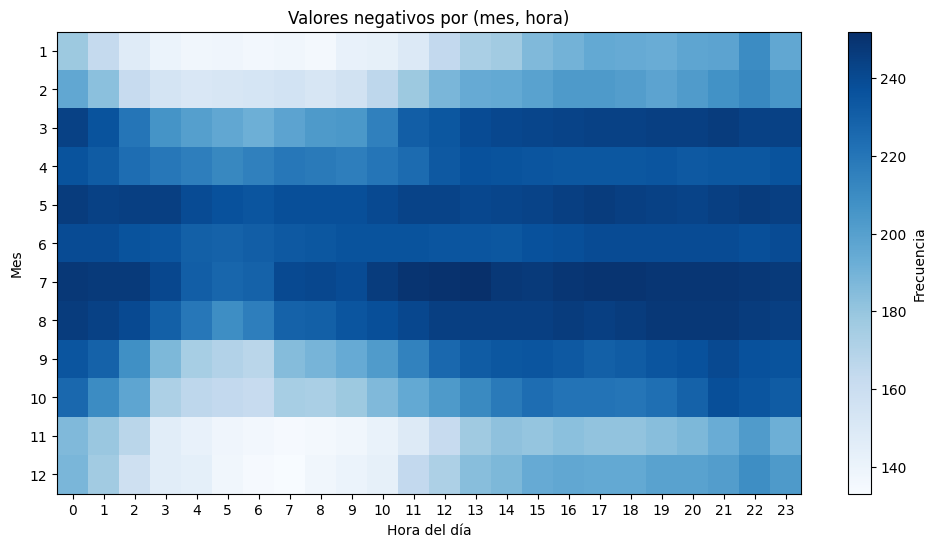

In [ ]:
if not negatives_all_df.empty:
    pivot_hour_month = negatives_all_df.pivot_table(index='month', columns='hour', values='consumption', aggfunc='count')
    print("Frecuencia de negativos por mes y hora:")
    display(pivot_hour_month)

    plt.figure(figsize=(12,6))
    plt.imshow(pivot_hour_month, cmap='Blues', aspect='auto')
    plt.colorbar(label='Frecuencia')
    plt.title('Valores negativos por (mes, hora)')
    plt.xlabel('Hora del día')
    plt.ylabel('Mes')
    plt.xticks(range(len(pivot_hour_month.columns)), pivot_hour_month.columns)
    plt.yticks(range(len(pivot_hour_month.index)), pivot_hour_month.index)
    plt.show()

In [ ]:
####################### Tratamiento de ouliers negativos ###########################

In [ ]:
def impute_negatives(df, window=24):
    df = df.copy()

    neg_mask = df['consumption'] < 0

    consumption_values = df['consumption'].values

    for i in range(len(consumption_values)):
        if consumption_values[i] < 0:

            start_idx = max(0, i-window)
            window_values = consumption_values[start_idx:i]

            valid_values = window_values[window_values >= 0]

            if len(valid_values) > 0:
                imputed_value = np.median(valid_values)
            else:
                imputed_value = 0.0

            consumption_values[i] = imputed_value

    df['consumption'] = consumption_values
    return df

In [ ]:
import numpy as np

train_cleaned_by_substation = {}
test_cleaned_by_substation = {}

for sub in unique_subs:
    train_df = train_filled_by_substation[sub]
    train_df = train_df.sort_values('date').reset_index(drop=True)
    train_cleaned = impute_negatives(train_df)

    test_df = test_filled_by_substation[sub]
    test_df = test_df.sort_values('date').reset_index(drop=True)

    test_cleaned = impute_negatives(test_df)

    train_cleaned_by_substation[sub] = train_cleaned
    test_cleaned_by_substation[sub] = test_cleaned


In [ ]:
for sub in unique_subs:
    negatives_train = (train_cleaned_by_substation[sub]['consumption'] < 0).sum()
    negatives_test = (test_cleaned_by_substation[sub]['consumption'] < 0).sum()
    print(f"Subestación: {sub}")
    print("Valores negativos en train luego de imputar:", negatives_train)
    print("Valores negativos en test luego de imputar:", negatives_test)
    print("---")


Subestación: AJAHUEL
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: BUIN
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: CHENA
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: CNAVIA
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: ELSALTO
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: FLORIDA
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---
Subestación: LOSALME
Valores negativos en train luego de imputar: 0
Valores negativos en test luego de imputar: 0
---


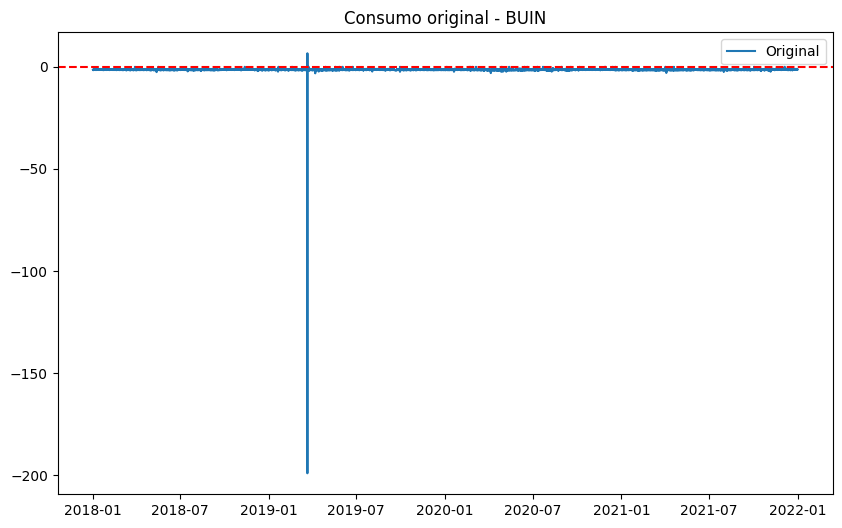

Valores negativos en BUIN: 34967
Total de registros en BUIN: 35064


In [ ]:
import matplotlib.pyplot as plt

buin_original = train_filled_by_substation['BUIN']
plt.figure(figsize=(10, 6))
plt.plot(buin_original['date'], buin_original['consumption'], label='Original')
plt.axhline(0, color='r', linestyle='--')
plt.title('Consumo original - BUIN')
plt.legend()
plt.show()

print("Valores negativos en BUIN:", (buin_original['consumption'] < 0).sum())
print("Total de registros en BUIN:", len(buin_original))

In [ ]:
train_cleaned_by_substation = {}
test_cleaned_by_substation = {}

# Solo copiamos los DataFrames sin aplicar imputación
for sub in unique_subs:
    train_df = train_filled_by_substation[sub].copy()
    test_df = test_filled_by_substation[sub].copy()

    train_cleaned_by_substation[sub] = train_df
    test_cleaned_by_substation[sub] = test_df

# Validamos que no se hayan modificado los valores negativos
for sub in unique_subs:
    negatives_train = (train_cleaned_by_substation[sub]['consumption'] < 0).sum()
    negatives_test = (test_cleaned_by_substation[sub]['consumption'] < 0).sum()
    print(f"Subestación: {sub}")
    print(f"Valores negativos en train: {negatives_train}")
    print(f"Valores negativos en test: {negatives_test}")
    print("---")


Subestación: AJAHUEL
Valores negativos en train: 73
Valores negativos en test: 10
---
Subestación: BUIN
Valores negativos en train: 34967
Valores negativos en test: 8759
---
Subestación: CHENA
Valores negativos en train: 42
Valores negativos en test: 4
---
Subestación: CNAVIA
Valores negativos en train: 25
Valores negativos en test: 0
---
Subestación: ELSALTO
Valores negativos en train: 0
Valores negativos en test: 1
---
Subestación: FLORIDA
Valores negativos en train: 25405
Valores negativos en test: 4971
---
Subestación: LOSALME
Valores negativos en train: 44
Valores negativos en test: 11
---


In [ ]:
################## Características nuevas y Normalización ###############################

In [ ]:
def add_time_features(df):
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['weekday'] = df['date'].dt.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x>=5 else 0)

    def get_season(m):
        if m in [12, 1, 2]:
            return 'summer'
        elif m in [3, 4, 5]:
            return 'autumn'
        elif m in [6, 7, 8]:
            return 'winter'
        else:
            return 'spring'

    df['season'] = df['month'].apply(get_season)

    return df


In [ ]:
#Aplicar las nuevas características temporales a cada subestación (train y test)
for sub in unique_subs:
    train_cleaned_by_substation[sub] = add_time_features(train_cleaned_by_substation[sub])
    test_cleaned_by_substation[sub] = add_time_features(test_cleaned_by_substation[sub])

In [ ]:
# Calcular el time_index relativo a la fecha mínima global
for sub in unique_subs:
    df_train = train_cleaned_by_substation[sub].copy()
    df_test = test_cleaned_by_substation[sub].copy()

    df_train = df_train.sort_values('date').reset_index(drop=True)
    df_test = df_test.sort_values('date').reset_index(drop=True)

    df_train['time_index'] = ((df_train['date'] - global_min_date)/pd.Timedelta(hours=1)).astype(int)
    df_test['time_index'] = ((df_test['date'] - global_min_date)/pd.Timedelta(hours=1)).astype(int)

    train_cleaned_by_substation[sub] = df_train
    test_cleaned_by_substation[sub] = df_test

In [ ]:
for sub in unique_subs:
    train_df = train_cleaned_by_substation[sub]
    test_df = test_cleaned_by_substation[sub]

    train_df = pd.get_dummies(train_df, columns=['season'], prefix='season')
    test_df = pd.get_dummies(test_df, columns=['season'], prefix='season')

    missing_cols = set(train_df.columns) - set(test_df.columns)
    for c in missing_cols:
        test_df[c] = 0

    test_df = test_df[train_df.columns]

    train_cleaned_by_substation[sub] = train_df
    test_cleaned_by_substation[sub] = test_df

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['consumption', 'year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'time_index']

all_train_data = pd.concat([train_cleaned_by_substation[sub] for sub in unique_subs], ignore_index=True)

scaler = MinMaxScaler()
scaler.fit(all_train_data[num_cols])

for sub in unique_subs:
    train_df = train_cleaned_by_substation[sub].copy()
    test_df = test_cleaned_by_substation[sub].copy()

    train_df[num_cols] = scaler.transform(train_df[num_cols])
    test_df[num_cols] = scaler.transform(test_df[num_cols])

    train_cleaned_by_substation[sub] = train_df
    test_cleaned_by_substation[sub] = test_df

In [ ]:
for sub in unique_subs:
    print(f"Subestación: {sub}")
    print(train_cleaned_by_substation[sub].head())
    print(test_cleaned_by_substation[sub].head())

Subestación: AJAHUEL
                 date substation  consumption  year  month  day      hour  \
0 2018-01-01 00:00:00    AJAHUEL     0.353658   0.0    0.0  0.0  0.000000   
1 2018-01-01 01:00:00    AJAHUEL     0.339688   0.0    0.0  0.0  0.043478   
2 2018-01-01 02:00:00    AJAHUEL     0.333476   0.0    0.0  0.0  0.086957   
3 2018-01-01 03:00:00    AJAHUEL     0.322710   0.0    0.0  0.0  0.130435   
4 2018-01-01 04:00:00    AJAHUEL     0.314785   0.0    0.0  0.0  0.173913   

   weekday  is_weekend  time_index  season_autumn  season_spring  \
0      0.0         0.0    0.000000          False          False   
1      0.0         0.0    0.000029          False          False   
2      0.0         0.0    0.000057          False          False   
3      0.0         0.0    0.000086          False          False   
4      0.0         0.0    0.000114          False          False   

   season_summer  season_winter  
0           True          False  
1           True          False  
2    

In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = [
    'year', 'month', 'day', 'hour', 'weekday', 'is_weekend',
    'time_index', 'season_autumn', 'season_spring',
    'season_summer', 'season_winter'
]

models_by_substation = {}

for sub in unique_subs:
    df_train = train_cleaned_by_substation[sub].copy()
    # Seleccionamos X y y
    X = df_train[feature_cols]
    y = df_train['consumption']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train, y_train)

    models_by_substation[sub] = rf_model

    val_preds = rf_model.predict(X_val)
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(y_val, val_preds)
    mse = mean_squared_error(y_val, val_preds)
    rmse = mse ** 0.5
    print(f"Subestación: {sub} - MAE en validación: {mae:.4f}, RMSE en validación: {rmse:.4f}")



Subestación: AJAHUEL - MAE en validación: 0.0296, RMSE en validación: 0.0383
Subestación: BUIN - MAE en validación: 0.0001, RMSE en validación: 0.0002
Subestación: CHENA - MAE en validación: 0.0311, RMSE en validación: 0.0516
Subestación: CNAVIA - MAE en validación: 0.0684, RMSE en validación: 0.0856
Subestación: ELSALTO - MAE en validación: 0.0779, RMSE en validación: 0.1011
Subestación: FLORIDA - MAE en validación: 0.0058, RMSE en validación: 0.0116
Subestación: LOSALME - MAE en validación: 0.0338, RMSE en validación: 0.0416


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for sub in unique_subs:
    rf_model = models_by_substation[sub]
    df_test = test_cleaned_by_substation[sub].copy()

    X_test = df_test[feature_cols]
    y_test = df_test['consumption']

    test_preds = rf_model.predict(X_test)

    mae_test = mean_absolute_error(y_test, test_preds)
    mse_test = mean_squared_error(y_test, test_preds)  # Calcula el MSE
    rmse_test = mse_test ** 0.5  # Calcula la raíz cuadrada del MSE

    # Verificar si la varianza de y_test es cero
    if sum((y_test - y_test.mean())**2) == 0:
        r2_test = "No aplicable (varianza de y_test = 0)"
    else:
        r2_test = 1 - (sum((y_test - test_preds)**2) / sum((y_test - y_test.mean())**2))

    print(f"Subestación: {sub}")
    print(f"MAE Test: {mae_test:.4f}, RMSE Test: {rmse_test:.4f}, R2: {r2_test}")
    print("---")


Subestación: AJAHUEL
MAE Test: 0.0693, RMSE Test: 0.1025, R2: -0.07979440690261086
---
Subestación: BUIN
MAE Test: 0.0004, RMSE Test: 0.0011, R2: -1.2585884000682381
---
Subestación: CHENA
MAE Test: 0.0815, RMSE Test: 0.1290, R2: -0.3229007729938711
---
Subestación: CNAVIA
MAE Test: 0.1534, RMSE Test: 0.2303, R2: 0.11461687913073504
---
Subestación: ELSALTO
MAE Test: 0.1880, RMSE Test: 0.2714, R2: -0.04253634120217464
---
Subestación: FLORIDA
MAE Test: 0.0215, RMSE Test: 0.0390, R2: -0.5127483150995034
---
Subestación: LOSALME
MAE Test: 0.0605, RMSE Test: 0.0835, R2: -0.1144319168040242
---


In [ ]:
################# Nuevo enfoque al modelo ##############

In [ ]:
# Mostrar las primeras filas del DataFrame para una subestación específica
sub = 'AJAHUEL'  # Reemplaza con la subestación que quieras inspeccionar

print("Train DataFrame para la subestación:", sub)
print(train_filled_by_substation[sub].head())

print("\nTest DataFrame para la subestación:", sub)
print(test_filled_by_substation[sub].head())

Train DataFrame para la subestación: AJAHUEL
                 date substation  consumption
0 2018-01-01 00:00:00    AJAHUEL   137.330840
1 2018-01-01 01:00:00    AJAHUEL   124.045549
2 2018-01-01 02:00:00    AJAHUEL   118.137811
3 2018-01-01 03:00:00    AJAHUEL   107.899499
4 2018-01-01 04:00:00    AJAHUEL   100.362069

Test DataFrame para la subestación: AJAHUEL
                     date substation  consumption
35064 2022-01-01 00:00:00    AJAHUEL   102.093131
35065 2022-01-01 01:00:00    AJAHUEL    82.379086
35066 2022-01-01 02:00:00    AJAHUEL    75.126780
35067 2022-01-01 03:00:00    AJAHUEL    69.140084
35068 2022-01-01 04:00:00    AJAHUEL    66.442176


In [ ]:
# Añadir variables derivadas al DataFrame específico de una subestación
def add_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['weekday'] = df['date'].dt.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    return df

# Aplicar a las subestaciones de train y test
train_filled_by_substation = {sub: add_features(df) for sub, df in train_filled_by_substation.items()}
test_filled_by_substation = {sub: add_features(df) for sub, df in test_filled_by_substation.items()}

In [ ]:
# Añadir columna 'time_index' basada en la posición de los registros
for sub in train_filled_by_substation:
    train_filled_by_substation[sub]['time_index'] = range(len(train_filled_by_substation[sub]))

for sub in test_filled_by_substation:
    test_filled_by_substation[sub]['time_index'] = range(len(test_filled_by_substation[sub]))

In [ ]:
# Crear series temporales solo con 'consumption' indexadas por 'date'
train_series_arima = {sub: df.set_index('date')['consumption'] for sub, df in train_filled_by_substation.items()}
test_series_arima = {sub: df.set_index('date')['consumption'] for sub, df in test_filled_by_substation.items()}

In [ ]:
# Crear matrices exógenas para cada subestación
train_series_sarimax = {
    sub: (df.set_index('date')['consumption'], df[['year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'time_index']])
    for sub, df in train_filled_by_substation.items()
}

test_series_sarimax = {
    sub: (df.set_index('date')['consumption'], df[['year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'time_index']])
    for sub, df in test_filled_by_substation.items()
}

In [ ]:
# Ejemplo para la subestación 'BUIN'
print("ARIMA Train Series:")
print(train_series_arima['BUIN'].head())

print("\nSARIMAX Train Series (Consumption):")
print(train_series_sarimax['BUIN'][0].head())

print("\nSARIMAX Train Series (Exogenous Variables):")
print(train_series_sarimax['BUIN'][1].head())

ARIMA Train Series:
date
2018-01-01 00:00:00   -1.469724
2018-01-01 01:00:00   -1.485837
2018-01-01 02:00:00   -1.509146
2018-01-01 03:00:00   -1.536619
2018-01-01 04:00:00   -1.564093
Name: consumption, dtype: float64

SARIMAX Train Series (Consumption):
date
2018-01-01 00:00:00   -1.469724
2018-01-01 01:00:00   -1.485837
2018-01-01 02:00:00   -1.509146
2018-01-01 03:00:00   -1.536619
2018-01-01 04:00:00   -1.564093
Name: consumption, dtype: float64

SARIMAX Train Series (Exogenous Variables):
   year  month  day  hour  weekday  is_weekend  time_index
0  2018      1    1     0        0           0           0
1  2018      1    1     1        0           0           1
2  2018      1    1     2        0           0           2
3  2018      1    1     3        0           0           3
4  2018      1    1     4        0           0           4


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Filtrar valores cercanos a cero en los datos reales
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Diccionario para almacenar resultados
arima_results = {}

# Evaluación para cada subestación
for sub in train_series_arima.keys():
    print(f"Entrenando ARIMA para subestación: {sub}")

    # Entrenar el modelo
    model_arima = ARIMA(train_series_arima[sub], order=(2, 1, 2))
    result_arima = model_arima.fit()

    # Predicciones
    forecast = result_arima.forecast(steps=len(test_series_arima[sub]))

    # Calcular métricas
    mse = mean_squared_error(test_series_arima[sub], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_series_arima[sub], forecast)
    mape = mean_absolute_percentage_error(test_series_arima[sub], forecast)

    # Almacenar resultados
    arima_results[sub] = {
        "model": result_arima,
        "forecast": forecast,
        "rmse": rmse,
        "mae": mae,
        "mape": mape
    }

Entrenando ARIMA para subestación: AJAHUEL
Entrenando ARIMA para subestación: BUIN
Entrenando ARIMA para subestación: CHENA
Entrenando ARIMA para subestación: CNAVIA
Entrenando ARIMA para subestación: ELSALTO
Entrenando ARIMA para subestación: FLORIDA
Entrenando ARIMA para subestación: LOSALME


In [ ]:
# Mostrar resultados de ejemplo
for sub, result in arima_results.items():
    print(f"\nResultados ARIMA para {sub}:")
    print(f"RMSE: {result['rmse']}")
    print(f"MAE: {result['mae']}")
    print(f"MAPE: {result['mape']}%")
    print(f"Primeras Predicciones: {result['forecast'][:5]}")


Resultados ARIMA para AJAHUEL:
RMSE: 112.23168608675024
MAE: 83.40252686780035
MAPE: 44.0603920876242%
Primeras Predicciones: 2022-01-01 00:00:00    113.665118
2022-01-01 01:00:00    110.533560
2022-01-01 02:00:00    110.746384
2022-01-01 03:00:00    113.573753
2022-01-01 04:00:00    118.197016
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA para BUIN:
RMSE: 0.7229207729700866
MAE: 0.47834419655765315
MAPE: 24.104536213494782%
Primeras Predicciones: 2022-01-01 00:00:00   -1.267522
2022-01-01 01:00:00   -1.309210
2022-01-01 02:00:00   -1.326827
2022-01-01 03:00:00   -1.348078
2022-01-01 04:00:00   -1.354225
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA para CHENA:
RMSE: 116.57746518118041
MAE: 81.59381011474592
MAPE: 127.37581136658609%
Primeras Predicciones: 2022-01-01 00:00:00    186.531269
2022-01-01 01:00:00    187.113503
2022-01-01 02:00:00    189.031667
2022-01-01 03:00:00    191.928769
2022-01-01 04:00:00    195.427366
Freq: H, Name: predicted_m

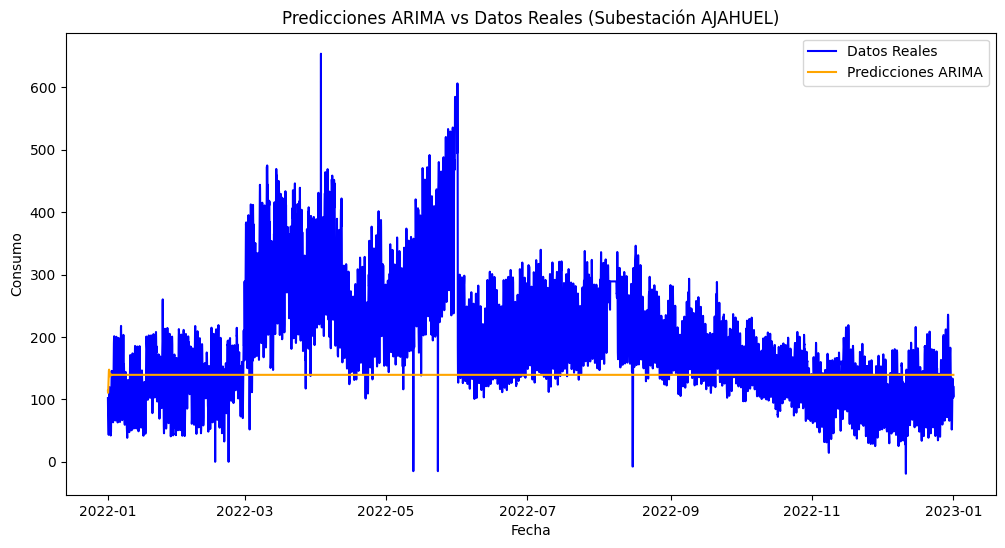

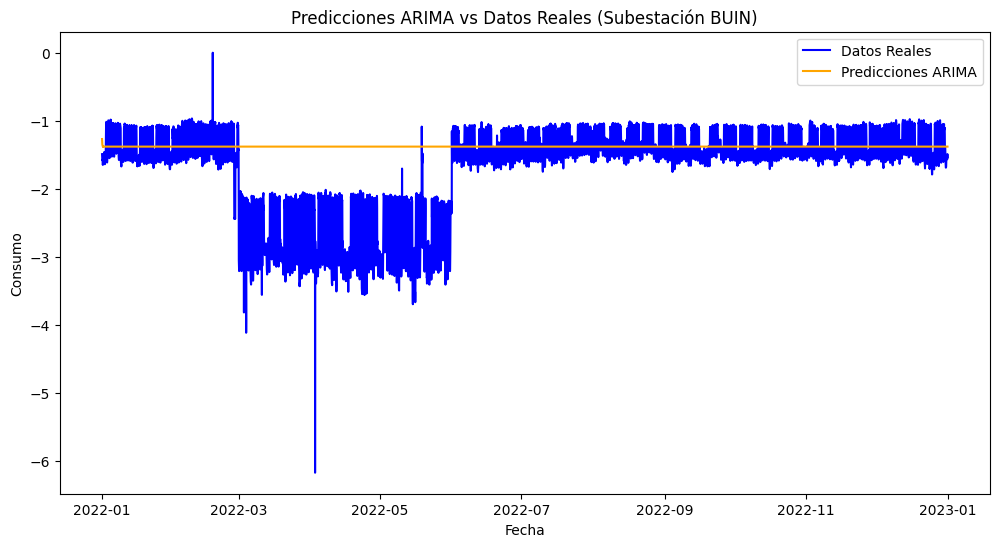

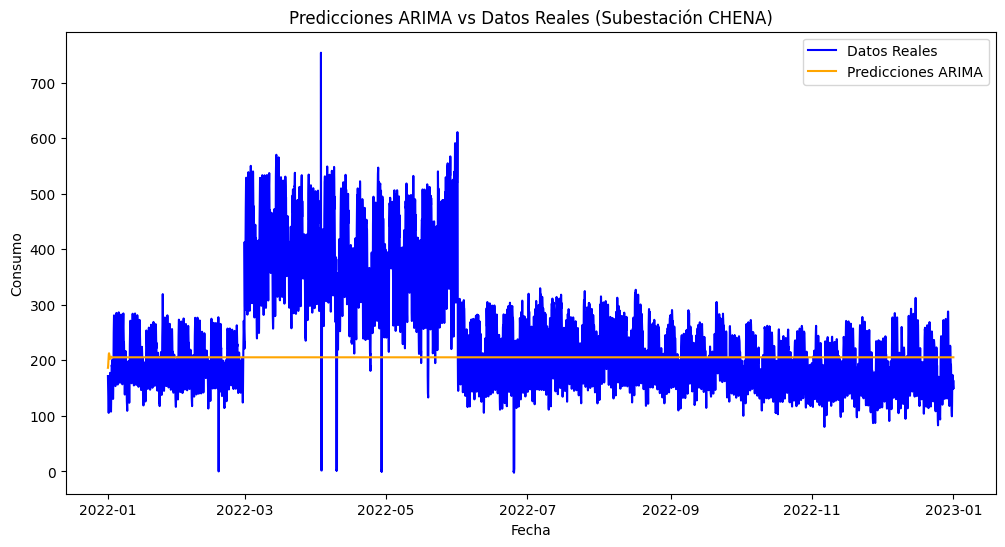

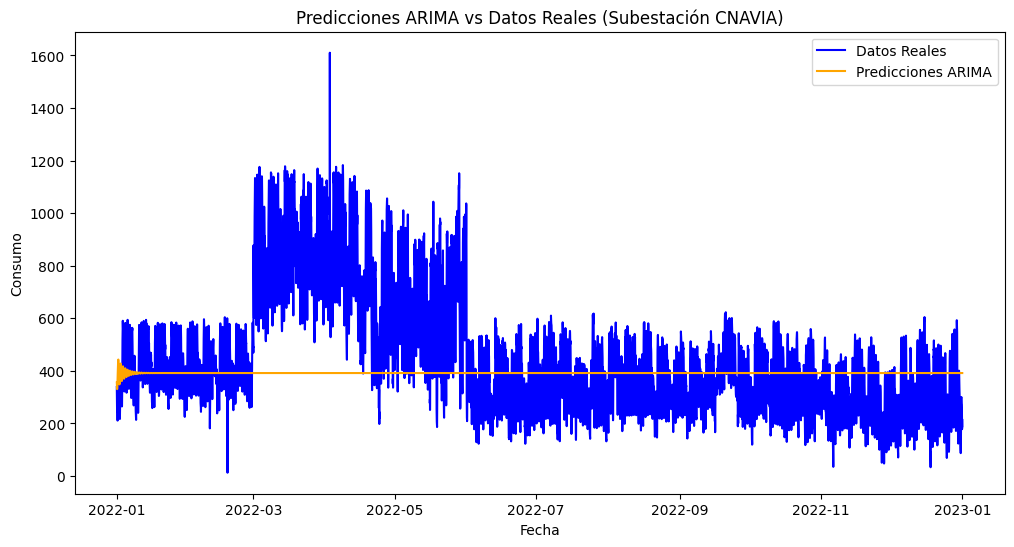

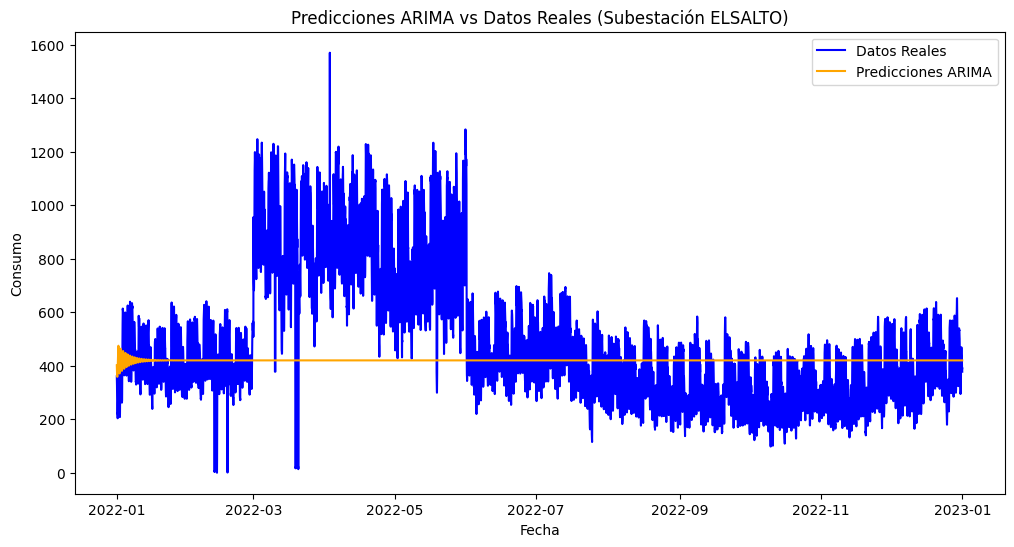

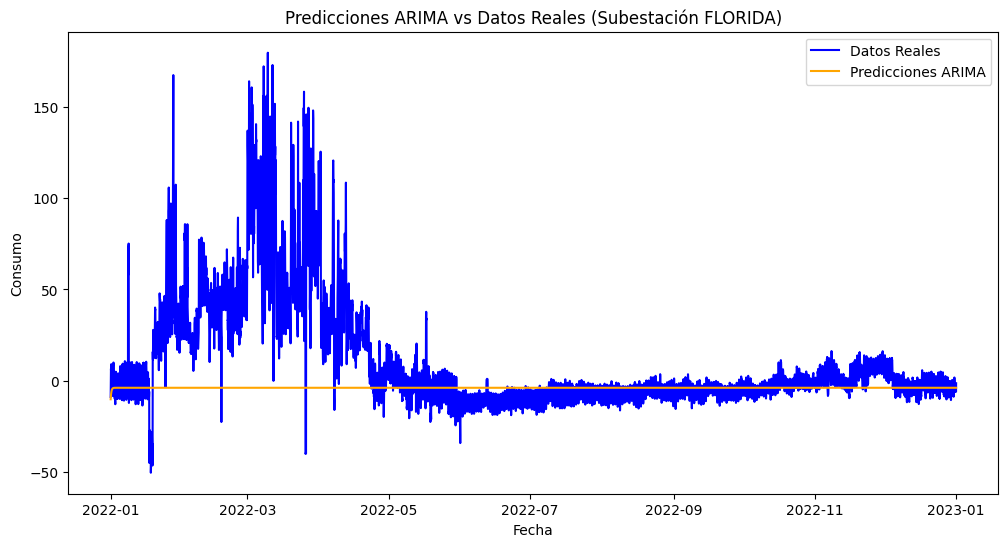

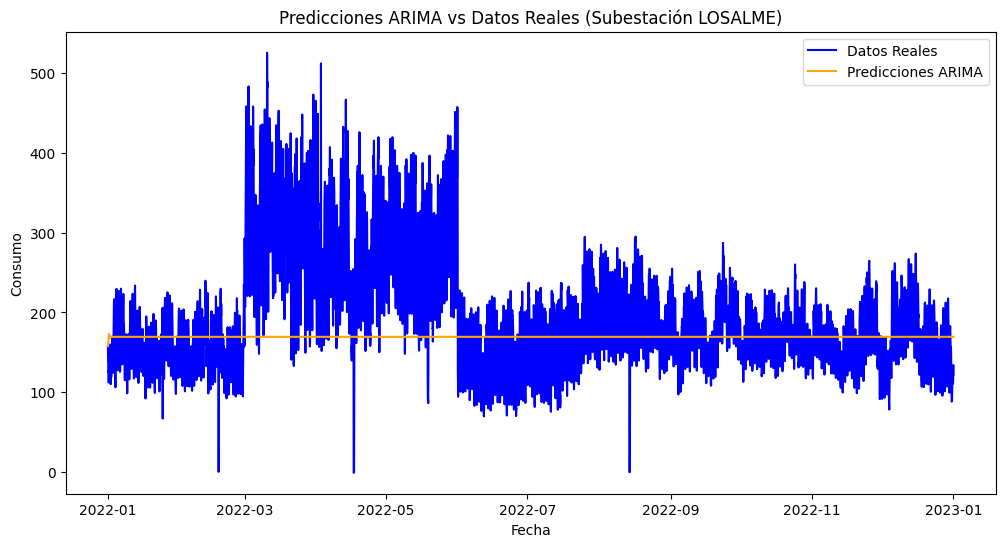

In [ ]:
import matplotlib.pyplot as plt

for sub in arima_results.keys():
    plt.figure(figsize=(12, 6))
    plt.plot(test_series_arima[sub], label="Datos Reales", color="blue")
    plt.plot(arima_results[sub]['forecast'], label="Predicciones ARIMA", color="orange")
    plt.title(f"Predicciones ARIMA vs Datos Reales (Subestación {sub})")
    plt.xlabel("Fecha")
    plt.ylabel("Consumo")
    plt.legend()
    plt.show()

In [ ]:
################# ajuste a ARIMA ####################

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suprimir warnings para modelos que no convergen
warnings.filterwarnings("ignore")

# Definir rango de valores para p, d, q
p = d = q = range(0, 3)  # Probar combinaciones de 0 a 2
pdq = list(itertools.product(p, d, q))

# Función para optimizar ARIMA
def optimize_arima(train_series, pdq):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq:
        try:
            model = ARIMA(train_series, order=order)
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = order
                best_model = result
        except:
            continue
    return best_order, best_model

# Diccionario para almacenar los mejores resultados
optimized_arima_results = {}

# Optimización para cada subestación
for sub in train_series_arima.keys():
    print(f"Optimización de ARIMA para subestación: {sub}")

    # Optimizar ARIMA para esta subestación
    best_order, best_model = optimize_arima(train_series_arima[sub], pdq)

    # Realizar predicciones
    forecast = best_model.forecast(steps=len(test_series_arima[sub]))

    # Calcular métricas de evaluación
    mse = mean_squared_error(test_series_arima[sub], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_series_arima[sub], forecast)
    mape = mean_absolute_percentage_error(test_series_arima[sub], forecast)

    # Almacenar resultados
    optimized_arima_results[sub] = {
        "best_order": best_order,
        "model": best_model,
        "forecast": forecast,
        "rmse": rmse,
        "mae": mae,
        "mape": mape
    }

Optimización de ARIMA para subestación: AJAHUEL
Optimización de ARIMA para subestación: BUIN
Optimización de ARIMA para subestación: CHENA
Optimización de ARIMA para subestación: CNAVIA
Optimización de ARIMA para subestación: ELSALTO
Optimización de ARIMA para subestación: FLORIDA
Optimización de ARIMA para subestación: LOSALME


In [ ]:
# Mostrar resultados optimizados
for sub, result in optimized_arima_results.items():
    print(f"\nResultados ARIMA Optimizado para {sub}:")
    print(f"Mejores Parámetros (p, d, q): {result['best_order']}")
    print(f"RMSE: {result['rmse']}")
    print(f"MAE: {result['mae']}")
    print(f"MAPE: {result['mape']}%")
    print(f"Primeras Predicciones: {result['forecast'][:5]}")


Resultados ARIMA Optimizado para AJAHUEL:
Mejores Parámetros (p, d, q): (2, 1, 2)
RMSE: 112.23168608675024
MAE: 83.40252686780035
MAPE: 44.0603920876242%
Primeras Predicciones: 2022-01-01 00:00:00    113.665118
2022-01-01 01:00:00    110.533560
2022-01-01 02:00:00    110.746384
2022-01-01 03:00:00    113.573753
2022-01-01 04:00:00    118.197016
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA Optimizado para BUIN:
Mejores Parámetros (p, d, q): (1, 0, 2)
RMSE: 0.7229589899657294
MAE: 0.478318427774565
MAPE: 24.100812402136572%
Primeras Predicciones: 2022-01-01 00:00:00   -1.432980
2022-01-01 01:00:00   -1.597983
2022-01-01 02:00:00   -1.372158
2022-01-01 03:00:00   -1.379075
2022-01-01 04:00:00   -1.378863
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA Optimizado para CHENA:
Mejores Parámetros (p, d, q): (2, 1, 2)
RMSE: 116.57746518118041
MAE: 81.59381011474592
MAPE: 127.37581136658609%
Primeras Predicciones: 2022-01-01 00:00:00    186.531269
2022-01-01 

In [ ]:
############### Nuevo ajuste ######################

In [ ]:
# Definir rango extendido para p, d, q
p = d = q = range(0, 5)  # Probar combinaciones de 0 a 4
pdq = list(itertools.product(p, d, q))

# Función para optimizar ARIMA con métricas adicionales
def advanced_optimize_arima(train_series, test_series, pdq):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq:
        try:
            model = ARIMA(train_series, order=order)
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = order
                best_model = result
        except:
            continue

    # Realizar predicciones con el mejor modelo
    forecast = best_model.forecast(steps=len(test_series))

    # Calcular métricas
    mse = mean_squared_error(test_series, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_series, forecast)
    mape = mean_absolute_percentage_error(test_series, forecast)

    return best_order, best_model, forecast, rmse, mae, mape

# Diccionario para almacenar resultados avanzados
advanced_arima_results = {}

# Optimización avanzada para cada subestación
for sub in train_series_arima.keys():
    print(f"Optimización Avanzada de ARIMA para subestación: {sub}")

    # Optimizar ARIMA con rango extendido
    best_order, best_model, forecast, rmse, mae, mape = advanced_optimize_arima(
        train_series_arima[sub],
        test_series_arima[sub],
        pdq
    )

    # Almacenar resultados
    advanced_arima_results[sub] = {
        "best_order": best_order,
        "model": best_model,
        "forecast": forecast,
        "rmse": rmse,
        "mae": mae,
        "mape": mape
    }

Optimización Avanzada de ARIMA para subestación: AJAHUEL
Optimización Avanzada de ARIMA para subestación: BUIN
Optimización Avanzada de ARIMA para subestación: CHENA
Optimización Avanzada de ARIMA para subestación: CNAVIA
Optimización Avanzada de ARIMA para subestación: ELSALTO
Optimización Avanzada de ARIMA para subestación: FLORIDA
Optimización Avanzada de ARIMA para subestación: LOSALME


In [ ]:
# Mostrar resultados avanzados
for sub, result in advanced_arima_results.items():
    print(f"\nResultados ARIMA Avanzado para {sub}:")
    print(f"Mejores Parámetros (p, d, q): {result['best_order']}")
    print(f"RMSE: {result['rmse']}")
    print(f"MAE: {result['mae']}")
    print(f"MAPE: {result['mape']}%")
    print(f"Primeras Predicciones: {result['forecast'][:5]}")



Resultados ARIMA Avanzado para AJAHUEL:
Mejores Parámetros (p, d, q): (4, 0, 4)
RMSE: 103.16593269926815
MAE: 76.41214765719175
MAPE: 44.651093805358954%
Primeras Predicciones: 2022-01-01 00:00:00    113.965214
2022-01-01 01:00:00    109.421678
2022-01-01 02:00:00    105.164101
2022-01-01 03:00:00    101.728856
2022-01-01 04:00:00    100.000824
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA Avanzado para BUIN:
Mejores Parámetros (p, d, q): (0, 3, 4)
RMSE: 3513496.5785648287
MAE: 3482277.6031928724
MAPE: 240024347.06298384%
Primeras Predicciones: 2022-01-01 00:00:00   -2.704752e+06
2022-01-01 01:00:00   -2.704915e+06
2022-01-01 02:00:00   -2.705078e+06
2022-01-01 03:00:00   -2.705241e+06
2022-01-01 04:00:00   -2.705404e+06
Freq: H, Name: predicted_mean, dtype: float64

Resultados ARIMA Avanzado para CHENA:
Mejores Parámetros (p, d, q): (4, 0, 4)
RMSE: 122.8799804999657
MAE: 85.6827731921316
MAPE: 120.6385084587322%
Primeras Predicciones: 2022-01-01 00:00:00    184.8984

In [ ]:
############ Usar parámetros mejores resultados #####################

In [ ]:
# Diccionario con los mejores parámetros por subestación
optimal_params = {
    'AJAHUEL': (4, 0, 4),
    'BUIN': (0, 3, 4),
    'CHENA': (4, 0, 4),
    'CNAVIA': (4, 1, 1),
    'ELSALTO': (4, 2, 4),
    'FLORIDA': (0, 4, 4),
    'LOSALME': (3, 0, 4)
}

# Diccionario para almacenar resultados finales
final_arima_results = {}

# Ajuste directo usando los parámetros óptimos
for sub, params in optimal_params.items():
    print(f"Entrenando modelo ARIMA para {sub} con parámetros {params}...")

    try:
        # Crear y ajustar modelo ARIMA con los mejores parámetros
        model = ARIMA(train_series_arima[sub], order=params)
        result = model.fit()

        # Predicciones
        forecast = result.forecast(steps=len(test_series_arima[sub]))

        # Métricas de evaluación
        rmse = np.sqrt(mean_squared_error(test_series_arima[sub], forecast))
        mae = mean_absolute_error(test_series_arima[sub], forecast)
        mape = mean_absolute_percentage_error(test_series_arima[sub], forecast)

        # Almacenar resultados
        final_arima_results[sub] = {
            "model": result,
            "forecast": forecast,
            "rmse": rmse,
            "mae": mae,
            "mape": mape
        }

        print(f"Resultados para {sub}:")
        print(f"  RMSE: {rmse}")
        print(f"  MAE: {mae}")
        print(f"  MAPE: {mape}%")
        print(f"  Primeras Predicciones: {forecast[:5]}")

    except Exception as e:
        print(f"Error al ajustar el modelo para {sub}: {e}")


Entrenando modelo ARIMA para AJAHUEL con parámetros (4, 0, 4)...
Resultados para AJAHUEL:
  RMSE: 103.16593269926815
  MAE: 76.41214765719175
  MAPE: 44.651093805358954%
  Primeras Predicciones: 2022-01-01 00:00:00    113.965214
2022-01-01 01:00:00    109.421678
2022-01-01 02:00:00    105.164101
2022-01-01 03:00:00    101.728856
2022-01-01 04:00:00    100.000824
Freq: H, Name: predicted_mean, dtype: float64
Entrenando modelo ARIMA para BUIN con parámetros (0, 3, 4)...
Resultados para BUIN:
  RMSE: 3513496.5785648287
  MAE: 3482277.6031928724
  MAPE: 240024347.06298384%
  Primeras Predicciones: 2022-01-01 00:00:00   -2.704752e+06
2022-01-01 01:00:00   -2.704915e+06
2022-01-01 02:00:00   -2.705078e+06
2022-01-01 03:00:00   -2.705241e+06
2022-01-01 04:00:00   -2.705404e+06
Freq: H, Name: predicted_mean, dtype: float64
Entrenando modelo ARIMA para CHENA con parámetros (4, 0, 4)...
Resultados para CHENA:
  RMSE: 122.8799804999657
  MAE: 85.6827731921316
  MAPE: 120.6385084587322%
  Primeras

In [ ]:
# Mostrar resumen final de todas las subestaciones
for sub, result in final_arima_results.items():
    print(f"\nResultados Finales ARIMA para {sub}:")
    print(f"  RMSE: {result['rmse']}")
    print(f"  MAE: {result['mae']}")
    print(f"  MAPE: {result['mape']}%")
    print(f"  Primeras Predicciones: {result['forecast'][:5]}")


Resultados Finales ARIMA para AJAHUEL:
  RMSE: 103.16593269926815
  MAE: 76.41214765719175
  MAPE: 44.651093805358954%
  Primeras Predicciones: 2022-01-01 00:00:00    113.965214
2022-01-01 01:00:00    109.421678
2022-01-01 02:00:00    105.164101
2022-01-01 03:00:00    101.728856
2022-01-01 04:00:00    100.000824
Freq: H, Name: predicted_mean, dtype: float64

Resultados Finales ARIMA para BUIN:
  RMSE: 3513496.5785648287
  MAE: 3482277.6031928724
  MAPE: 240024347.06298384%
  Primeras Predicciones: 2022-01-01 00:00:00   -2.704752e+06
2022-01-01 01:00:00   -2.704915e+06
2022-01-01 02:00:00   -2.705078e+06
2022-01-01 03:00:00   -2.705241e+06
2022-01-01 04:00:00   -2.705404e+06
Freq: H, Name: predicted_mean, dtype: float64

Resultados Finales ARIMA para CHENA:
  RMSE: 122.8799804999657
  MAE: 85.6827731921316
  MAPE: 120.6385084587322%
  Primeras Predicciones: 2022-01-01 00:00:00    184.898495
2022-01-01 01:00:00    181.089299
2022-01-01 02:00:00    175.430820
2022-01-01 03:00:00    168.7

In [ ]:
############### SARIMAX #####################

In [ ]:
# Reindexar las variables exógenas para que coincidan con los índices de las series endógenas
aligned_exog_train = {}
aligned_exog_test = {}

for sub in train_series_sarimax:
    # Reindexar las variables exógenas de entrenamiento
    aligned_exog_train[sub] = exog_train[sub].reindex(index=train_series_sarimax[sub][0].index).fillna(0)
    # Reindexar las variables exógenas de prueba
    aligned_exog_test[sub] = exog_test[sub].reindex(index=test_series_sarimax[sub][0].index).fillna(0)

# Reintentar el ajuste de SARIMAX con índices alineados
sarimax_results = {}

for sub, params in sarimax_params.items():
    print(f"Entrenando SARIMAX para {sub} con parámetros {params}...")

    try:
        # Crear modelo SARIMAX
        model = SARIMAX(
            train_series_sarimax[sub][0],  # Serie de consumo
            exog=aligned_exog_train[sub],  # Variables exógenas alineadas
            order=params[0],               # Parámetros SARIMA
            seasonal_order=params[1]       # Componente estacional
        )
        result = model.fit(disp=False)

        # Predicciones
        forecast = result.forecast(
            steps=len(test_series_sarimax[sub][0]),
            exog=aligned_exog_test[sub]
        )

        # Métricas de evaluación
        rmse = np.sqrt(mean_squared_error(test_series_sarimax[sub][0], forecast))
        mae = mean_absolute_error(test_series_sarimax[sub][0], forecast)
        mape = mean_absolute_percentage_error(test_series_sarimax[sub][0], forecast)

        # Almacenar resultados
        sarimax_results[sub] = {
            "model": result,
            "forecast": forecast,
            "rmse": rmse,
            "mae": mae,
            "mape": mape
        }

        print(f"Resultados para {sub}:")
        print(f"  RMSE: {rmse}")
        print(f"  MAE: {mae}")
        print(f"  MAPE: {mape}%")
        print(f"  Primeras Predicciones: {forecast[:5]}")

    except Exception as e:
        print(f"Error al ajustar SARIMAX para {sub}: {e}")

Entrenando SARIMAX para AJAHUEL con parámetros ((2, 1, 2), (1, 0, 1, 24))...
Resultados para AJAHUEL:
  RMSE: 110.1057523195271
  MAE: 81.8111644139859
  MAPE: 38.90139213267883%
  Primeras Predicciones: 2022-01-01 00:00:00    105.017165
2022-01-01 01:00:00     86.379897
2022-01-01 02:00:00     70.357935
2022-01-01 03:00:00     59.726007
2022-01-01 04:00:00     55.412551
Freq: H, Name: predicted_mean, dtype: float64
Entrenando SARIMAX para BUIN con parámetros ((2, 1, 1), (1, 0, 1, 24))...
Resultados para BUIN:
  RMSE: 0.7229387243467991
  MAE: 0.4782424265426781
  MAPE: 24.09175514999489%
  Primeras Predicciones: 2022-01-01 00:00:00   -1.319324
2022-01-01 01:00:00   -1.363364
2022-01-01 02:00:00   -1.380515
2022-01-01 03:00:00   -1.385606
2022-01-01 04:00:00   -1.386563
Freq: H, Name: predicted_mean, dtype: float64
Entrenando SARIMAX para CHENA con parámetros ((2, 1, 2), (1, 0, 1, 24))...
Resultados para CHENA:
  RMSE: 107.85237710264586
  MAE: 71.94973824912726
  MAPE: 114.65417099628

In [ ]:
# Resumen final
for sub, result in sarimax_results.items():
    print(f"\nResultados Finales SARIMAX para {sub}:")
    print(f"  RMSE: {result['rmse']}")
    print(f"  MAE: {result['mae']}")
    print(f"  MAPE: {result['mape']}%")
    print(f"  Primeras Predicciones: {result['forecast'][:5]}")


Resultados Finales SARIMAX para AJAHUEL:
  RMSE: 110.1057523195271
  MAE: 81.8111644139859
  MAPE: 38.90139213267883%
  Primeras Predicciones: 2022-01-01 00:00:00    105.017165
2022-01-01 01:00:00     86.379897
2022-01-01 02:00:00     70.357935
2022-01-01 03:00:00     59.726007
2022-01-01 04:00:00     55.412551
Freq: H, Name: predicted_mean, dtype: float64

Resultados Finales SARIMAX para BUIN:
  RMSE: 0.7229387243467991
  MAE: 0.4782424265426781
  MAPE: 24.09175514999489%
  Primeras Predicciones: 2022-01-01 00:00:00   -1.319324
2022-01-01 01:00:00   -1.363364
2022-01-01 02:00:00   -1.380515
2022-01-01 03:00:00   -1.385606
2022-01-01 04:00:00   -1.386563
Freq: H, Name: predicted_mean, dtype: float64

Resultados Finales SARIMAX para CHENA:
  RMSE: 107.85237710264586
  MAE: 71.94973824912726
  MAPE: 114.65417099628785%
  Primeras Predicciones: 2022-01-01 00:00:00    178.212585
2022-01-01 01:00:00    163.149184
2022-01-01 02:00:00    147.490825
2022-01-01 03:00:00    136.161791
2022-01-0

In [ ]:
# Verificar subestaciones en los datos
print("Subestaciones disponibles en los datos de entrenamiento:", list(train_series_sarimax.keys()))
print("Subestaciones con resultados SARIMAX:", list(sarimax_results.keys()))

# Identificar subestaciones faltantes
faltantes = set(train_series_sarimax.keys()) - set(sarimax_results.keys())
print("Subestaciones faltantes:", faltantes)

Subestaciones disponibles en los datos de entrenamiento: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA', 'LOSALME']
Subestaciones con resultados SARIMAX: ['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'FLORIDA', 'LOSALME']
Subestaciones faltantes: {'ELSALTO'}


In [ ]:
# Mostrar información de la subestación faltante
if faltantes:
    for sub in faltantes:
        print(f"Verificando datos para {sub}...")
        print("Datos de entrenamiento:")
        print(train_series_sarimax[sub][0].head())
        print("Variables exógenas de entrenamiento:")
        print(exog_train[sub].head())
        print("Datos de prueba:")
        print(test_series_sarimax[sub][0].head())
        print("Variables exógenas de prueba:")
        print(exog_test[sub].head())

Verificando datos para ELSALTO...
Datos de entrenamiento:
date
2018-01-01 00:00:00    212.495636
2018-01-01 01:00:00    200.802108
2018-01-01 02:00:00    189.173441
2018-01-01 03:00:00    181.010940
2018-01-01 04:00:00    168.960606
Name: consumption, dtype: float64
Variables exógenas de entrenamiento:
   year  month  day  hour  weekday  is_weekend  time_index
0  2018      1    1     0        0           0           0
1  2018      1    1     1        0           0           1
2  2018      1    1     2        0           0           2
3  2018      1    1     3        0           0           3
4  2018      1    1     4        0           0           4
Datos de prueba:
date
2022-01-01 00:00:00    359.832168
2022-01-01 01:00:00    339.531309
2022-01-01 02:00:00    324.435725
2022-01-01 03:00:00    269.229137
2022-01-01 04:00:00    259.029278
Name: consumption, dtype: float64
Variables exógenas de prueba:
       year  month  day  hour  weekday  is_weekend  time_index
35064  2022      1    1

In [ ]:
try:
    model = SARIMAX(
        train_series_sarimax['ELSALTO'][0],
        exog=aligned_exog_train['ELSALTO'],
        order=(1, 1, 1),  # Parámetros más simples
        seasonal_order=(0, 0, 0, 0)  # Sin componente estacional
    )
    result = model.fit(disp=False)
    forecast = result.forecast(steps=len(test_series_sarimax['ELSALTO'][0]), exog=aligned_exog_test['ELSALTO'])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(test_series_sarimax['ELSALTO'][0], forecast))
    mae = mean_absolute_error(test_series_sarimax['ELSALTO'][0], forecast)
    mape = mean_absolute_percentage_error(test_series_sarimax['ELSALTO'][0], forecast)

    print(f"Resultados para ELSALTO (sin estacionalidad):")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape}%")
    print(f"  Primeras Predicciones: {forecast[:5]}")
except Exception as e:
    print(f"Error al ajustar SARIMAX para ELSALTO (sin estacionalidad): {e}")


Resultados para ELSALTO (sin estacionalidad):
  RMSE: 271.66612995880956
  MAE: 191.99058846261576
  MAPE: 66.47336339456064%
  Primeras Predicciones: 2022-01-01 00:00:00    413.271820
2022-01-01 01:00:00    410.556241
2022-01-01 02:00:00    408.754632
2022-01-01 03:00:00    407.559382
2022-01-01 04:00:00    406.766413
Freq: H, Name: predicted_mean, dtype: float64


In [ ]:
print("Resultados Finales SARIMAX para todas las subestaciones:")
for sub, result in sarimax_results.items():
    print(f"\nSubestación: {sub}")
    print(f"  RMSE: {result['rmse']}")
    print(f"  MAE: {result['mae']}")
    print(f"  MAPE: {result['mape']}%")
    print(f"  Primeras Predicciones: {result['forecast'][:5]}")

Resultados Finales SARIMAX para todas las subestaciones:

Subestación: AJAHUEL
  RMSE: 110.1057523195271
  MAE: 81.8111644139859
  MAPE: 38.90139213267883%
  Primeras Predicciones: 2022-01-01 00:00:00    105.017165
2022-01-01 01:00:00     86.379897
2022-01-01 02:00:00     70.357935
2022-01-01 03:00:00     59.726007
2022-01-01 04:00:00     55.412551
Freq: H, Name: predicted_mean, dtype: float64

Subestación: BUIN
  RMSE: 0.7229387243467991
  MAE: 0.4782424265426781
  MAPE: 24.09175514999489%
  Primeras Predicciones: 2022-01-01 00:00:00   -1.319324
2022-01-01 01:00:00   -1.363364
2022-01-01 02:00:00   -1.380515
2022-01-01 03:00:00   -1.385606
2022-01-01 04:00:00   -1.386563
Freq: H, Name: predicted_mean, dtype: float64

Subestación: CHENA
  RMSE: 107.85237710264586
  MAE: 71.94973824912726
  MAPE: 114.65417099628785%
  Primeras Predicciones: 2022-01-01 00:00:00    178.212585
2022-01-01 01:00:00    163.149184
2022-01-01 02:00:00    147.490825
2022-01-01 03:00:00    136.161791
2022-01-01 0

In [ ]:
# Crear copias de los DataFrames actuales
train_series_arima_original = train_series_arima.copy()
train_series_sarimax_original = train_series_sarimax.copy()
test_series_arima_original = test_series_arima.copy()
test_series_sarimax_original = test_series_sarimax.copy()

In [ ]:
##################### segundp tratamiento de outliers ##################

In [ ]:
import numpy as np

# Función para identificar outliers usando IQR
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Identificar outliers en el conjunto de entrenamiento para cada subestación
outliers_per_substation = {}
for sub in train_series_arima:
    outliers = detect_outliers(train_series_arima[sub])
    outliers_per_substation[sub] = outliers
    print(f"Subestación: {sub}, Outliers detectados: {len(outliers)}")

Subestación: AJAHUEL, Outliers detectados: 165
Subestación: BUIN, Outliers detectados: 174
Subestación: CHENA, Outliers detectados: 310
Subestación: CNAVIA, Outliers detectados: 70
Subestación: ELSALTO, Outliers detectados: 201
Subestación: FLORIDA, Outliers detectados: 2547
Subestación: LOSALME, Outliers detectados: 135


In [ ]:
# Mostrar estadísticas de los outliers para cada subestación
for sub, outliers in outliers_per_substation.items():
    print(f"\nSubestación: {sub}")
    print(f"Valores máximos de outliers: {outliers.nlargest(5)}")
    print(f"Valores mínimos de outliers: {outliers.nsmallest(5)}")


Subestación: AJAHUEL
Valores máximos de outliers: date
2021-04-03 23:00:00    348.887471
2018-08-02 21:00:00    324.758684
2018-08-02 20:00:00    324.497938
2018-07-22 22:00:00    324.404649
2018-07-22 21:00:00    323.570385
Name: consumption, dtype: float64
Valores mínimos de outliers: date
2018-09-06 11:00:00   -159.019095
2018-01-03 23:00:00    -73.552760
2018-01-04 00:00:00    -73.489645
2018-01-04 01:00:00    -72.438750
2018-01-03 22:00:00    -46.166978
Name: consumption, dtype: float64

Subestación: BUIN
Valores máximos de outliers: date
2019-03-21 17:00:00    6.623003
2018-03-29 03:00:00    0.000000
2018-03-29 04:00:00    0.000000
2018-05-16 20:00:00    0.000000
2018-05-16 21:00:00    0.000000
Name: consumption, dtype: float64
Valores mínimos de outliers: date
2019-03-21 14:00:00   -199.000000
2019-03-21 15:00:00   -199.000000
2019-03-21 16:00:00   -199.000000
2019-04-06 23:00:00     -3.194611
2020-04-04 23:00:00     -3.083526
Name: consumption, dtype: float64

Subestación: CHE

In [ ]:
import pandas as pd

# Crear una lista para almacenar los datos
outliers_data = []

# Iterar sobre cada subestación y sus outliers
for sub, outliers in outliers_per_substation.items():
    # Obtener los valores máximos y mínimos
    max_outliers = outliers.nlargest(5)
    min_outliers = outliers.nsmallest(5)

    # Agregar los datos a la lista
    for index, value in max_outliers.items():
        outliers_data.append({"Subestación": sub, "Tipo": "Máximo", "Fecha": index, "Valor": value})
    for index, value in min_outliers.items():
        outliers_data.append({"Subestación": sub, "Tipo": "Mínimo", "Fecha": index, "Valor": value})

# Crear un DataFrame a partir de los datos
outliers_df = pd.DataFrame(outliers_data)

# Guardar el DataFrame en un archivo CSV
outliers_df.to_csv("outliers_subestaciones.csv", index=False)

print("Archivo CSV generado: outliers_subestaciones.csv")

Archivo CSV generado: outliers_subestaciones.csv


In [ ]:
############## análisis ##############

In [ ]:
outliers_df.rename(columns={
    'Subestación': 'substation',
    'Tipo': 'type',
    'Fecha': 'date',
    'Valor': 'value'
}, inplace=True)

In [ ]:
outliers_df['date'] = pd.to_datetime(outliers_df['date'], errors='coerce')

In [ ]:
outliers_df['month'] = outliers_df['date'].dt.month
outliers_by_month = outliers_df.groupby(['substation', 'month']).size().reset_index(name='outlier_count')
outliers_by_month = outliers_by_month.sort_values(['substation', 'month'])
print(outliers_by_month)

   substation  month  outlier_count
0     AJAHUEL      1              4
1     AJAHUEL      4              1
2     AJAHUEL      7              2
3     AJAHUEL      8              2
4     AJAHUEL      9              1
5        BUIN      3              6
6        BUIN      4              2
7        BUIN      5              2
8       CHENA      5              5
9       CHENA      7              1
10      CHENA      9              3
11      CHENA     11              1
12     CNAVIA      1              1
13     CNAVIA      3              1
14     CNAVIA      4              3
15     CNAVIA      5              3
16     CNAVIA      6              1
17     CNAVIA     12              1
18    ELSALTO      3              5
19    ELSALTO      4              1
20    ELSALTO      5              1
21    ELSALTO     10              3
22    FLORIDA     11              3
23    FLORIDA     12              7
24    LOSALME      1              2
25    LOSALME      8              3
26    LOSALME     11        

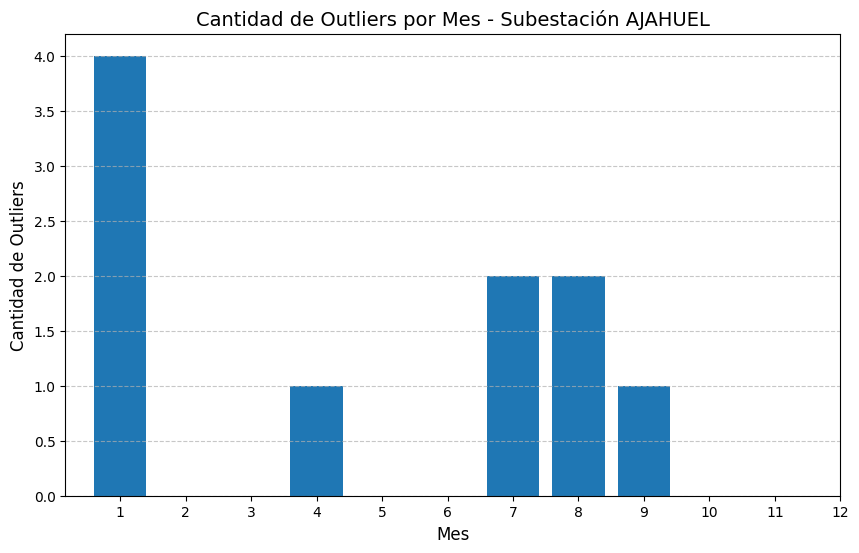

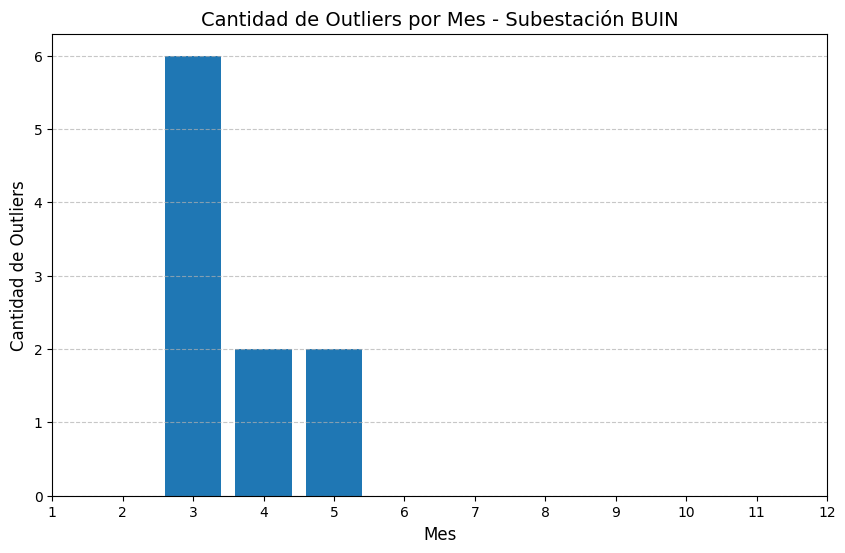

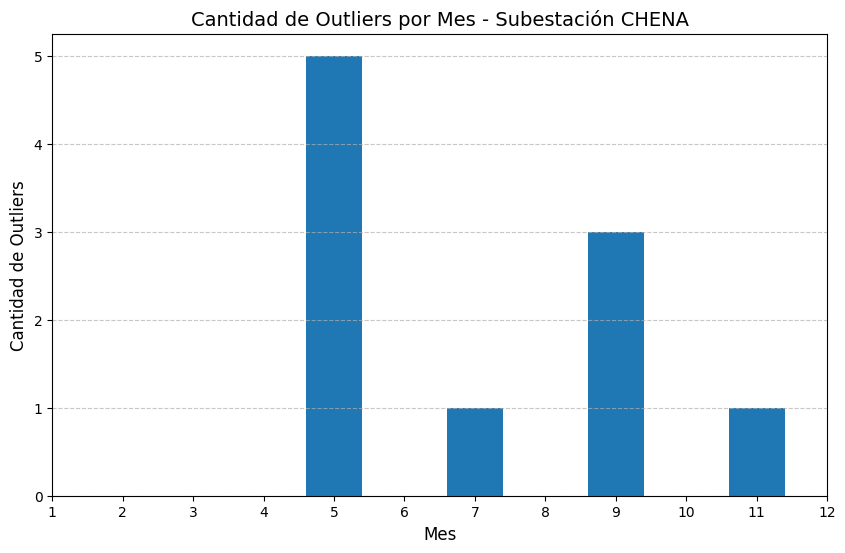

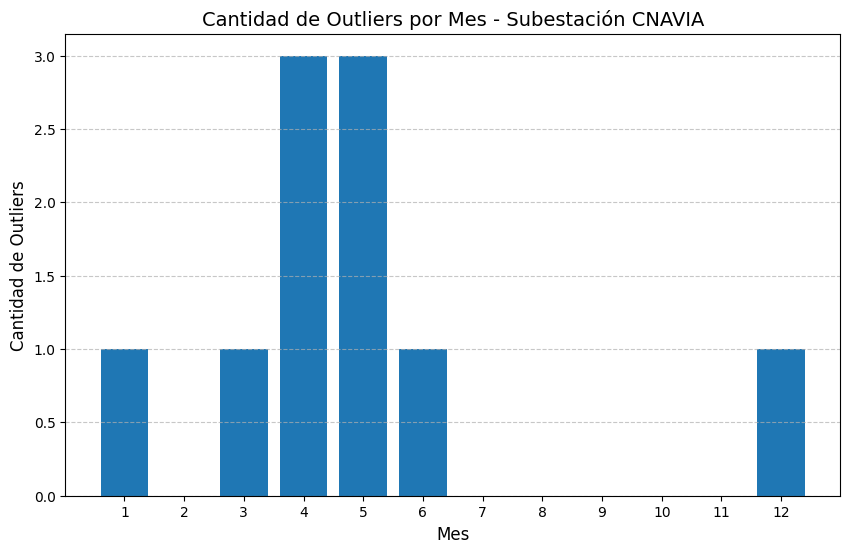

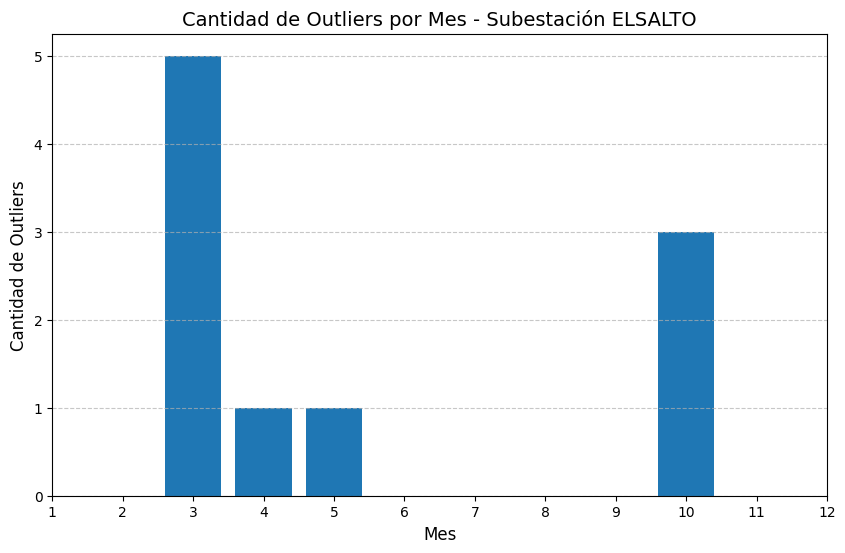

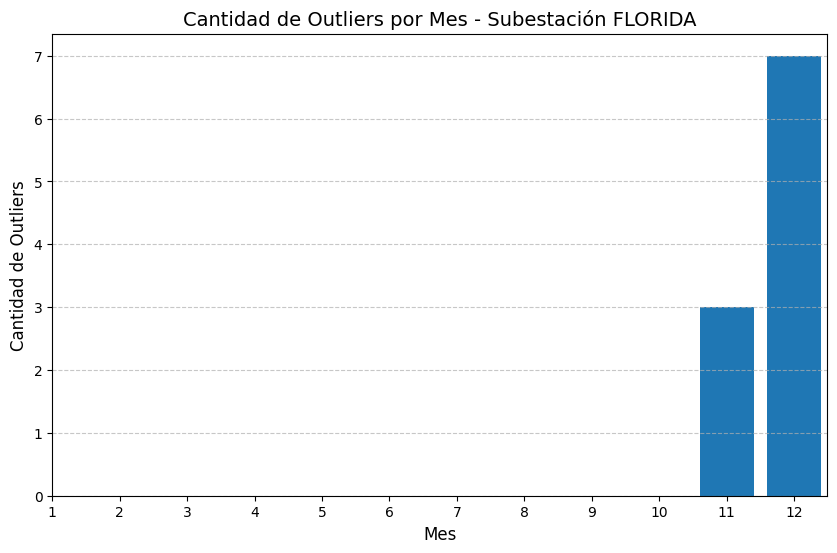

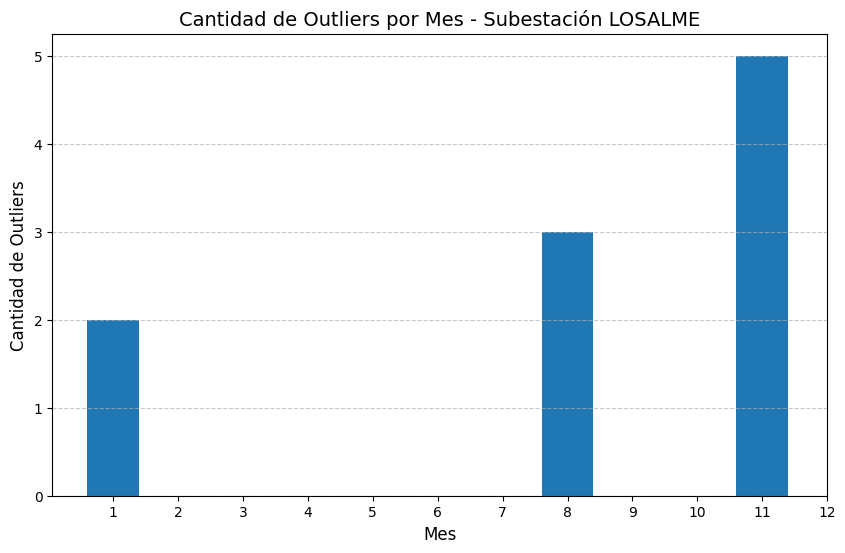

In [ ]:
import matplotlib.pyplot as plt

# Crear gráficos para cada subestación
subestaciones = outliers_by_month['substation'].unique()

for sub in subestaciones:
    # Filtrar datos por subestación
    data_sub = outliers_by_month[outliers_by_month['substation'] == sub]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(data_sub['month'], data_sub['outlier_count'])
    plt.title(f"Cantidad de Outliers por Mes - Subestación {sub}", fontsize=14)
    plt.xlabel("Mes", fontsize=12)
    plt.ylabel("Cantidad de Outliers", fontsize=12)
    plt.xticks(range(1, 13))  # Asegurarse de que muestre todos los meses
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
# Convertir la columna 'date' a tipo datetime
outliers_df['date'] = pd.to_datetime(outliers_df['date'])

# Agregar columnas de características temporales
outliers_df['day_of_week'] = outliers_df['date'].dt.dayofweek  # Día de la semana
outliers_df['is_weekend'] = outliers_df['day_of_week'].isin([5, 6])  # Fines de semana
outliers_df['month'] = outliers_df['date'].dt.month  # Mes
outliers_df['season'] = outliers_df['month'].apply(lambda x:
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall')  # Estación

# Mostrar las primeras filas para verificar
print(outliers_df.head())


  substation    type                date       value  month  day_of_week  \
0    AJAHUEL  Máximo 2021-04-03 23:00:00  348.887471      4            5   
1    AJAHUEL  Máximo 2018-08-02 21:00:00  324.758684      8            3   
2    AJAHUEL  Máximo 2018-08-02 20:00:00  324.497938      8            3   
3    AJAHUEL  Máximo 2018-07-22 22:00:00  324.404649      7            6   
4    AJAHUEL  Máximo 2018-07-22 21:00:00  323.570385      7            6   

   is_weekend  season  
0        True  Spring  
1       False  Summer  
2       False  Summer  
3        True  Summer  
4        True  Summer  


In [ ]:
# Contar outliers por temporada y subestación
outliers_by_season = outliers_df.groupby(['substation', 'season']).size().reset_index(name='outlier_count')

# Ordenar resultados
outliers_by_season = outliers_by_season.sort_values(['substation', 'season'])

# Mostrar el resumen
print(outliers_by_season)

# Opcional: guardar el análisis en un archivo CSV
outliers_by_season.to_csv("outliers_by_season.csv", index=False)

   substation  season  outlier_count
0     AJAHUEL    Fall              1
1     AJAHUEL  Spring              1
2     AJAHUEL  Summer              4
3     AJAHUEL  Winter              4
4        BUIN  Spring             10
5       CHENA    Fall              4
6       CHENA  Spring              5
7       CHENA  Summer              1
8      CNAVIA  Spring              7
9      CNAVIA  Summer              1
10     CNAVIA  Winter              2
11    ELSALTO    Fall              3
12    ELSALTO  Spring              7
13    FLORIDA    Fall              3
14    FLORIDA  Winter              7
15    LOSALME    Fall              5
16    LOSALME  Summer              3
17    LOSALME  Winter              2


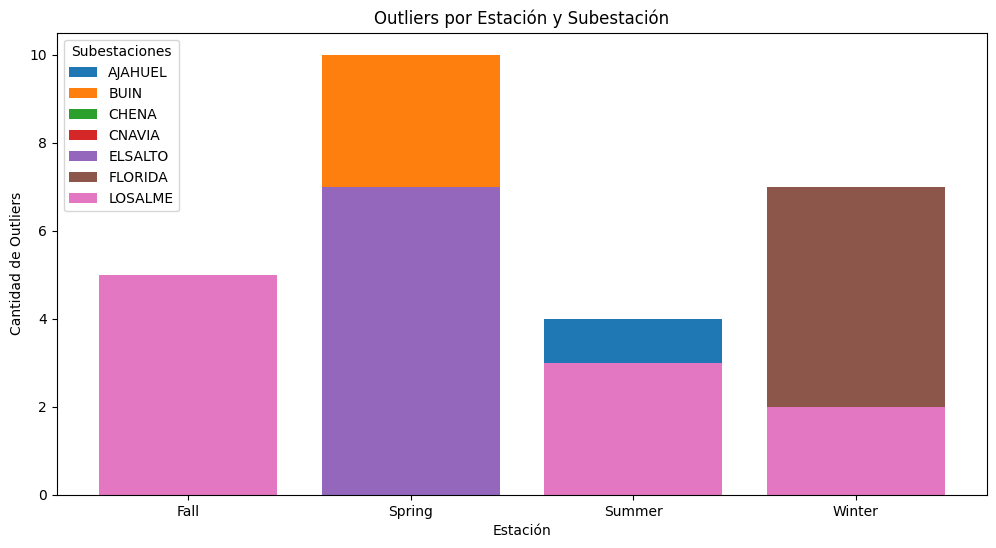

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por subestación y estación, y contar los outliers
outliers_by_season = outliers_df.groupby(['substation', 'season']).size().reset_index(name='outlier_count')

# Crear un gráfico de barras para cada subestación
plt.figure(figsize=(12, 6))
for sub in outliers_by_season['substation'].unique():
    sub_data = outliers_by_season[outliers_by_season['substation'] == sub]
    plt.bar(sub_data['season'], sub_data['outlier_count'], label=sub)

plt.title("Outliers por Estación y Subestación")
plt.xlabel("Estación")
plt.ylabel("Cantidad de Outliers")
plt.legend(title="Subestaciones")
plt.show()

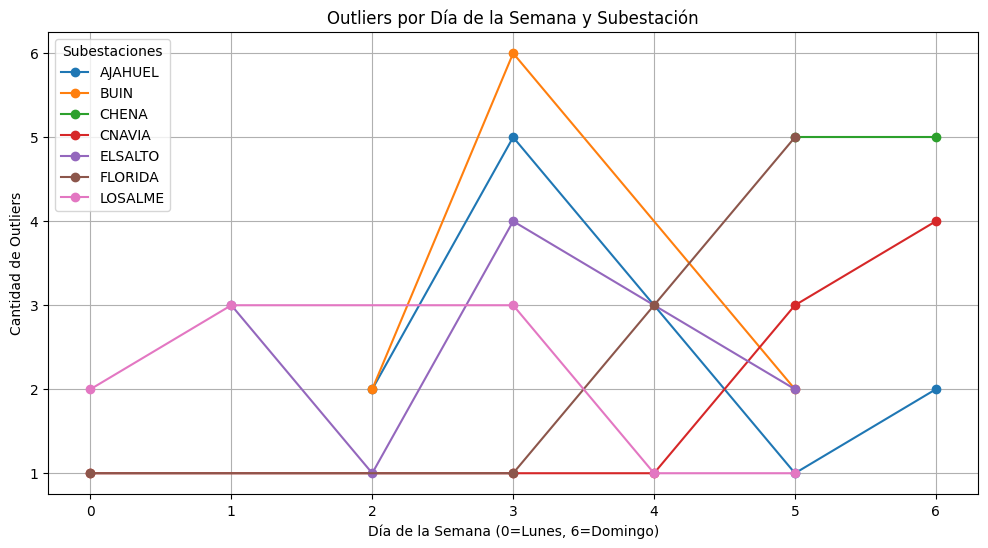

In [ ]:
# Agrupar los datos por subestación y día de la semana
outliers_by_weekday = outliers_df.groupby(['substation', 'day_of_week']).size().reset_index(name='outlier_count')

# Crear un gráfico de barras para cada subestación
plt.figure(figsize=(12, 6))
for sub in outliers_by_weekday['substation'].unique():
    sub_data = outliers_by_weekday[outliers_by_weekday['substation'] == sub]
    plt.plot(sub_data['day_of_week'], sub_data['outlier_count'], marker='o', label=sub)

plt.title("Outliers por Día de la Semana y Subestación")
plt.xlabel("Día de la Semana (0=Lunes, 6=Domingo)")
plt.ylabel("Cantidad de Outliers")
plt.legend(title="Subestaciones")
plt.grid(True)
plt.show()

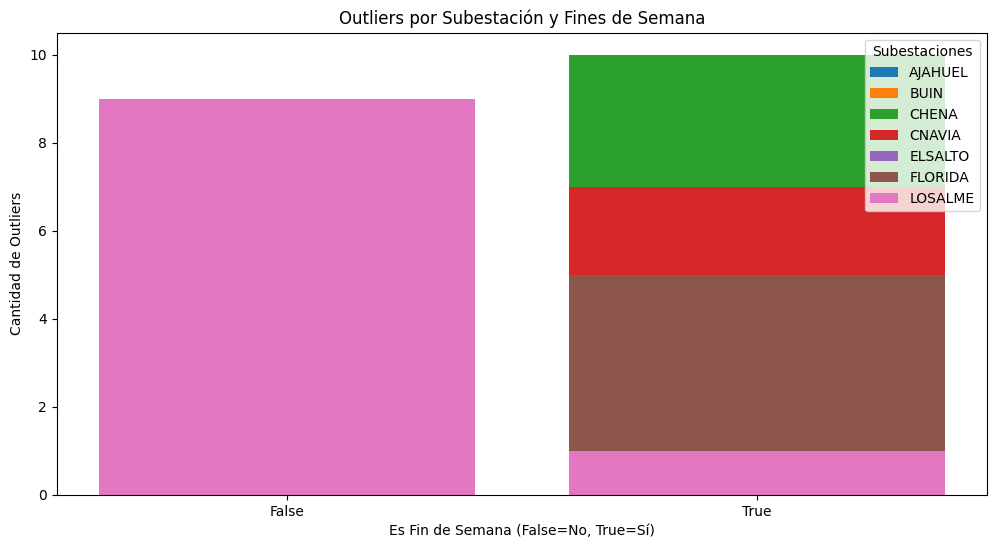

In [ ]:
# Agrupar por subestación y si es fin de semana
outliers_by_weekend = outliers_df.groupby(['substation', 'is_weekend']).size().reset_index(name='outlier_count')

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
for sub in outliers_by_weekend['substation'].unique():
    sub_data = outliers_by_weekend[outliers_by_weekend['substation'] == sub]
    plt.bar(sub_data['is_weekend'].astype(str), sub_data['outlier_count'], label=sub)

plt.title("Outliers por Subestación y Fines de Semana")
plt.xlabel("Es Fin de Semana (False=No, True=Sí)")
plt.ylabel("Cantidad de Outliers")
plt.legend(title="Subestaciones")
plt.show()

In [ ]:
############ verificar si son ruido ###############

In [ ]:
for substation in outliers_df['substation'].unique():
    sub_df = outliers_df[outliers_df['substation'] == substation]
    print(f"\nSubestación: {substation}")
    print("Media histórica por temporada:")
    print(sub_df.groupby('season')['value'].mean())
    print("Outliers extremos:")
    print(sub_df[sub_df['value'] > sub_df['value'].quantile(0.95)])  # Ajusta percentil según necesidad


Subestación: AJAHUEL
Media histórica por temporada:
season
Fall     -159.019095
Spring    348.887471
Summer    324.307914
Winter    -66.412033
Name: value, dtype: float64
Outliers extremos:
  substation    type                date       value  month  day_of_week  \
0    AJAHUEL  Máximo 2021-04-03 23:00:00  348.887471      4            5   

   is_weekend  season  
0        True  Spring  

Subestación: BUIN
Media histórica por temporada:
season
Spring   -59.665513
Name: value, dtype: float64
Outliers extremos:
   substation    type                date     value  month  day_of_week  \
10       BUIN  Máximo 2019-03-21 17:00:00  6.623003      3            3   

    is_weekend  season  
10       False  Spring  

Subestación: CHENA
Media histórica por temporada:
season
Fall       -1.658551
Spring    468.312649
Summer    -74.498545
Name: value, dtype: float64
Outliers extremos:
   substation    type                date       value  month  day_of_week  \
20      CHENA  Máximo 2021-05-29 20:00

In [ ]:
########### suavizar y recudir ruido ##########

In [ ]:
# Suavizar valores extremos relevantes usando promedio de vecinos
def smooth_outliers(data, column, threshold=3):
    rolling_mean = data[column].rolling(window=3, center=True).mean()
    outlier_condition = (data[column] - rolling_mean).abs() > threshold * data[column].std()
    data.loc[outlier_condition, column] = rolling_mean
    return data

# Aplicar suavización por subestación
for sub in outliers_df['substation'].unique():
    sub_data = outliers_df[outliers_df['substation'] == sub]
    outliers_df.loc[outliers_df['substation'] == sub] = smooth_outliers(sub_data, 'value')

In [ ]:
# Reemplazar outliers no relevantes con la mediana de su subestación y estación
for sub in outliers_df['substation'].unique():
    for season in outliers_df['season'].unique():
        condition = (outliers_df['substation'] == sub) & (outliers_df['season'] == season)
        median_value = outliers_df.loc[condition, 'value'].median()
        outliers_df.loc[condition & (outliers_df['value'].abs() > 3 * outliers_df['value'].std()), 'value'] = median_value

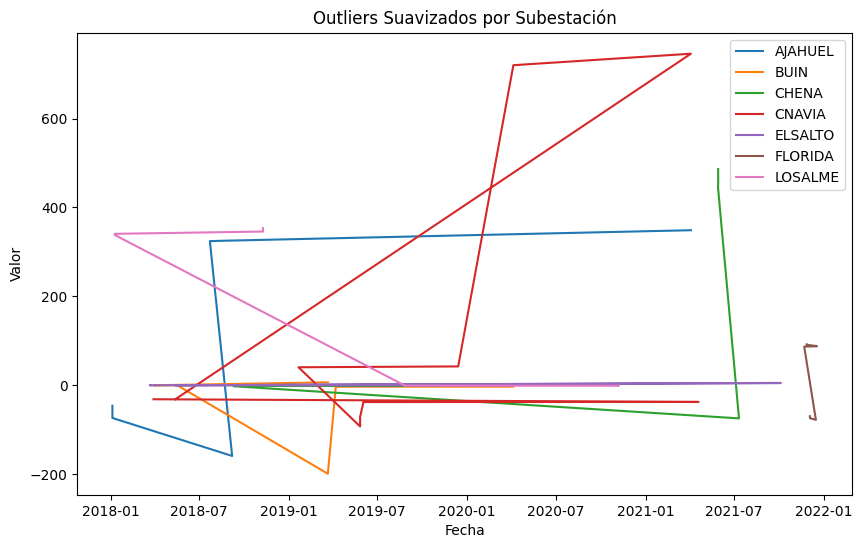

In [ ]:
# Graficar datos suavizados y ajustados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for sub in outliers_df['substation'].unique():
    sub_data = outliers_df[outliers_df['substation'] == sub]
    plt.plot(sub_data['date'], sub_data['value'], label=sub)

plt.title("Outliers Suavizados por Subestación")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
# Analizar los datos faltantes
missing_data = outliers_df.isnull().sum()
print("Datos faltantes por columna:\n", missing_data)

# Mostrar filas con datos faltantes (si las hay)
missing_rows = outliers_df[outliers_df.isnull().any(axis=1)]
print("\nFilas con datos faltantes:\n", missing_rows)

Datos faltantes por columna:
 substation     0
type           0
date           0
value          0
month          0
day_of_week    0
is_weekend     0
season         0
dtype: int64

Filas con datos faltantes:
 Empty DataFrame
Columns: [substation, type, date, value, month, day_of_week, is_weekend, season]
Index: []


In [ ]:
import pandas as pd
import numpy as np

# Supongamos que los datos originales están en el DataFrame `outliers_df`
# Crear `outliers_smoothed` a partir de `outliers_df`
outliers_smoothed = outliers_df.copy()

# Suavizar valores extremos aplicando un método, como la mediana de los valores vecinos
outliers_smoothed['value'] = outliers_smoothed['value'].apply(
    lambda x: np.nan if abs(x) > outliers_df['value'].mean() + 3 * outliers_df['value'].std() else x
)
# Rellenar valores suavizados (interpolación como ejemplo)
outliers_smoothed['value'] = outliers_smoothed['value'].interpolate()

# Confirmar que no hay valores faltantes
print(outliers_smoothed.isnull().sum())

substation     0
type           0
date           0
value          0
month          0
day_of_week    0
is_weekend     0
season         0
dtype: int64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar ARIMA por subestación
arima_results = {}

for sub in outliers_smoothed['substation'].unique():
    print(f"Entrenando ARIMA para {sub}...")
    # Filtrar datos de la subestación
    sub_data = outliers_smoothed[outliers_smoothed['substation'] == sub].set_index('date')['value']

    # Parámetros basados en análisis anterior (p, d, q)
    model = ARIMA(sub_data, order=(2, 1, 2))  # Ajustar si lo necesitas

    # Ajustar modelo
    try:
        arima_results[sub] = model.fit()
        print(f"Modelo ARIMA ajustado para {sub}")
    except Exception as e:
        print(f"Error al ajustar ARIMA para {sub}: {e}")


Entrenando ARIMA para AJAHUEL...
Error al ajustar ARIMA para AJAHUEL: LU decomposition error.
Entrenando ARIMA para BUIN...
Modelo ARIMA ajustado para BUIN
Entrenando ARIMA para CHENA...
Modelo ARIMA ajustado para CHENA
Entrenando ARIMA para CNAVIA...
Modelo ARIMA ajustado para CNAVIA
Entrenando ARIMA para ELSALTO...
Modelo ARIMA ajustado para ELSALTO
Entrenando ARIMA para FLORIDA...
Modelo ARIMA ajustado para FLORIDA
Entrenando ARIMA para LOSALME...
Modelo ARIMA ajustado para LOSALME
